In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt, savgol_filter
from scipy.signal import find_peaks

#Python之pandas读取Excel表格空值为nan的处理 https://blog.csdn.net/wl_Honest/article/details/99082977
#第一步選定需要比較的檔案
def coma(df):
    
    listRX1=[]
    listRX2=[]

    listRY1=[]
    listRY2=[]

    listRZ1=[]
    listRZ2=[]

    listLX1=[]
    listLX2=[]

    listLY1=[]
    listLY2=[]

    listLZ1=[]
    listLZ2=[]


    listGRX=[]
    listGRY=[]
    listGRZ=[]

    listGLX=[]
    listGLY=[]
    listGLZ=[]


    listflag_Record=[]
    listflag_one=[]
    listflag_two=[]
    listflag_three=[]

    listRtoe=[]
    listLtoe=[]

    listRX1=df.RightFootAcc_X.tolist() 
    listRY1=df.RightFootAcc_Y.tolist() 
    listRZ1=df.RightFootAcc_Z.tolist() 

    listLX1=df.LeftFootAcc_X.tolist() 
    listLY1=df.LeftFootAcc_Y.tolist() 
    listLZ1=df.LeftFootAcc_Z.tolist() 


    listGRX=df.RightFootGyro_X.tolist()
    listGRY=df.RightFootGyro_Y.tolist()
    listGRZ=df.RightFootGyro_Z.tolist()

    listGLX=df.LeftFootGyro_X.tolist()
    listGLY=df.LeftFootGyro_Y.tolist()
    listGLZ=df.LeftFootGyro_Z.tolist()

    listflag_Record=df.Record.tolist()
    listflag_one=df.Record.tolist()
    listflag_two=df.Record.tolist()
    listflag_three=df.Record.tolist()


    #去除空白
    listRX1 = [i for i in listRX1 if i != '']
    listRX2 = [i for i in listRX2 if i != '']

    listRY1 = [i for i in listRY1 if i != '']
    listRY2 = [i for i in listRY2 if i != '']

    listRZ1 = [i for i in listRZ1 if i != '']
    listRZ2 = [i for i in listRZ2 if i != '']

    listLX1 = [i for i in listLX1 if i != '']
    listLX2 = [i for i in listLX2 if i != '']

    listLY1 = [i for i in listLY1 if i != '']
    listLY2 = [i for i in listLY2 if i != '']

    listLZ1 = [i for i in listLZ1 if i != '']
    listLZ2 = [i for i in listLZ2 if i != '']

    listGRX = [i for i in listGRX if i != '']
    listGRY = [i for i in listGRY if i != '']
    listGRZ = [i for i in listGRZ if i != '']

    listGLX = [i for i in listGLX if i != '']
    listGLY = [i for i in listGLY if i != '']
    listGLZ = [i for i in listGLZ if i != '']



   

    #抓出雙腳最大承認點數
    gaitmin=0
    if(len(listRX1)<len(listLX1)):
        gaitmin=len(listRX1)
    else:
        gaitmin=len(listLX1)
    #print(gaitmin)
    gaitmin=9600
    # #抓二級疼痛
    # for f in range(a):
    #     if(listflag_Record[f]=='2級疼痛'):
    #         listflag_Record[f]=f
    #     else:
    #         listflag_Record[f]=''
    # listflag_Record = [i for i in listflag_Record if i != '']

    #抓轉彎
    for f in range(len(listflag_Record)):
         if (f >= gaitmin):
            listflag_Record[f]=''
        
         elif(listflag_Record[f]=='轉彎'):
            listflag_Record[f]=f
        
         else:
            listflag_Record[f]=''

    listflag_Record = [i for i in listflag_Record if i != '']

    #抓一級疼痛
    for f in range(len(listflag_one)):
        
        if (f >= gaitmin):
            listflag_one[f]=''
        
        elif(listflag_one[f]=='1級疼痛'):
            listflag_one[f]=f
        
        else:
            listflag_one[f]=''

    listflag_one = [i for i in listflag_one if i != '']
    


    #抓二級疼痛
    for f in range(len(listflag_two)):
        if (f >= gaitmin):
            listflag_two[f]=''
        
        elif(listflag_two[f]=='2級疼痛'):
            listflag_two[f]=f
        
        else:
            listflag_two[f]=''
    listflag_two = [i for i in listflag_two if i != '']


    #抓三級疼痛
    for f in range(len(listflag_three)):
        if (f >= gaitmin):
            listflag_three[f]=''
        
        elif(listflag_three[f]=='3級疼痛'):
            listflag_three[f]=f
        
        else:
            listflag_three[f]=''
    listflag_three = [i for i in listflag_three if i != '']


    l=len(listRX1)
    #右腳X要乘-1
    for i in range(l):
        listRX1[i]= listRX1[i]*(-1)

    l=len(listGRZ)
    #右腳陀螺儀Z軸要乘-1
    for i in range(l):
        listGRZ[i]= listGRZ[i]*(-1)

    listRrss=[]
    for i in range(len(listRX1)): 
        listRrss.append(np.sqrt((listRX1[i] ** 2) + (listRY1[i] ** 2) + (listRZ1[i] ** 2))) 

    listLrss=[]
    for i in range(len(listLX1)): 
        listLrss.append(np.sqrt((listLX1[i] ** 2) + (listLY1[i] ** 2) + (listLZ1[i] ** 2))) 
        
    listRX1=listRX1[0:9600]
    listRY1=listRY1[0:9600]
    listRZ1=listRZ1[0:9600]
    listLX1=listLX1[0:9600]
    listLY1=listLY1[0:9600]
    listLZ1=listLZ1[0:9600]
    listflag_Record=listflag_Record[0:9600]
    listflag_one=listflag_one[0:9600]
    listflag_two=listflag_two[0:9600]
    listflag_three=listflag_three[0:9600]

    return listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRX,listGRY,listGRZ,listGLX,listGLY,listGLZ,listRrss,listLrss





#第一步選定需要比較的檔案
df = pd.read_excel("李O貴2.xlsx",keep_default_na=False)
listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRX,listGRY,listGRZ,listGLX,listGLY,listGLZ,listRrss,listLrss=coma(df)

# df = pd.read_excel("轉彎.xlsx",keep_default_na=False)
# listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record=coma(df)


#
#第二步選定切割的檔案"
df = pd.read_excel("總李O貴2(手動切割).xlsx",keep_default_na=False)

one=[]
two=[]
three=[]
four=[]

#one[0]為右腳第一步起始點
one=df.Rtoe_off.tolist()


#two[0]為左腳第一步起始點
two=df.Ltoe_off.tolist() 


# #three為右腳每步間距點
# for i in range(len(one)-1):
#     three.append(one[i+1]-one[i])


# #four為左腳每步間距點
# for i in range(len(two)-1):
#     four.append(two[i+1]-two[i])



# print("右腳總步數")
# print(len(three)+1)
# #右腳:可以讓(後減前)=剩餘位置
# print("右腳每步間距")
# print(three)
# print("=====================================================================================================================================")

# print("左腳總步數")
# print(len(four)+1)
# #左腳:可以讓(後減前)=剩餘位置 
# print("左腳每步間距")
# print(four)
# print("=====================================================================================================================================")


if(len(listflag_Record)%2!=0):
    print("請先手動輸入補差值")
    print("=====================================================================================================================================")
    print("轉彎位置")
    print(listflag_Record)

# print(listflag_one)
# print(listflag_two)
# print(listflag_three)



確認轉彎位置和次數

In [4]:
if(len(listflag_Record)%2!=0):
    print("請先手動輸入補差值")
    print("=====================================================================================================================================\n")
print("轉彎次數") 
print(len(listflag_Record)/2)    
print("轉彎位置")    
listflag_Record

轉彎次數
4.0
轉彎位置


[635, 867, 2687, 2926, 4894, 5086, 7343, 7609]

In [5]:
print("1級疼痛次數") 
print(len(listflag_one))    
print("2級疼痛次數") 
print(len(listflag_two))   
print("3級疼痛次數") 
print(len(listflag_three))   

1級疼痛次數
1
2級疼痛次數
1
3級疼痛次數
0


切割右腳每一步位置

In [6]:
#記錄每一步的起始點到終點 [one,two,......] %2==0:為當步起始點 %2==1:為當步終點 two-one+1因為頭尾都要算所以要+1
R_gait=[]
R_flag_gait=[]
#紀錄到底幾步
Rgait=0

for i in range(len(one)-1):
    
    R_first_gait=one[i]
    R_secend_gait=one[i+1]
    Rgait=Rgait+1
    #if(Rgait != 44 and Rgait != 111 and Rgait != 157 and Rgait != 226):
        #print(Rgait)
    R_gait.append(R_first_gait)
    R_gait.append(R_secend_gait-1)
    R_flag_gait.append(i)
    # print("第"+str(Rgait)+"步:"+str(R_first_gait)+"到"+str(R_secend_gait-1))
    # print("總距離"+str(R_secend_gait-R_first_gait))
    # print("=====")
    
    # print(R_secend_gait)
    # print(i)

    #確定步態位置
    if( Rgait>67 and Rgait <77):
        print("第"+str(Rgait)+"步:"+str(R_first_gait)+"到"+str(R_secend_gait))
        print("距離"+str(R_secend_gait-R_first_gait))
        print("=====")

    # if(len(three)-2==i):
    #     R_first_gait=one+three[i+1]
    #     Rgait=Rgait+1
    #     #print("第"+str(Rgait)+"步:"+str(R_first_gait))
    
#確認轉彎陣列紀錄   
#print(len(R_gait)/2)



第68步:6376到6472
距離96
=====
第69步:6472到6575
距離103
=====
第70步:6575到6667
距離92
=====
第71步:6667到6789
距離122
=====
第72步:6789到6882
距離93
=====
第73步:6882到6978
距離96
=====
第74步:6978到7076
距離98
=====
第75步:7076到7174
距離98
=====
第76步:7174到7273
距離99
=====


切割左腳每一步位置

In [7]:
#記錄每一步的起始點到終點 [one,two,......] %2==0:為當步起始點 %2==1:為當步終點 two-one+1因為頭尾都要算所以要+1
L_gait=[]
#紀錄到底幾步
Lgait=0

for i in range(len(two)-1):
    
    L_first_gait=two[i]
    L_secend_gait=two[i+1]
    Lgait=Lgait+1
    #if(Rgait != 44 and Rgait != 111 and Rgait != 157 and Rgait != 226):
        #print(Rgait)
    L_gait.append(L_first_gait)
    L_gait.append(L_secend_gait-1)
    # print("第"+str(Lgait)+"步:"+str(L_first_gait)+"到"+str(L_secend_gait-1))
    # print("總距離"+str(L_secend_gait-L_first_gait))
    # print("=====")

    # if(Lgait>32 and Lgait<40):
    #     print("第"+str(Lgait)+"步:"+str(L_first_gait)+"到"+str(L_secend_gait-1))
    #     print("距離"+str(L_secend_gait-L_first_gait))
    #     print("=====")

印出來檢查

In [8]:
#印出來檢查
#第一個數字/2+1就是要的步數
# for i in range(36,45,2):
#     print(R_gait[i])
#     print(R_gait[i+1])
#     print("========")
# #listflag_Record計算轉彎用
# for j in range (0,len(listflag_Record)-1,2):
#     print(listflag_Record[j])
#     print(listflag_Record[j+1])
#     print("*************")

In [9]:
#計算轉彎次數
flagR_turn=[]
for i in range(0,len(R_gait)-1,2):
    for j in range (0,len(listflag_Record)-1,2):
        if(R_gait[i]<=listflag_Record[j] and R_gait[i+1]>= listflag_Record[j]) or  (R_gait[i]>=listflag_Record[j] and R_gait[i+1]<= listflag_Record[j+1]) or(R_gait[i]<=listflag_Record[j+1] and R_gait[i+1]>= listflag_Record[j+1])  :
            # print("R_turn[i]")
            # print(R_turn[i])

            # print("R_turn[i+1]")
            # print(R_turn[i+1])

            # print("listflag_Record[j]")
            # print(listflag_Record[j])

            # print("listflag_Record[j+1]")
            # print(listflag_Record[j+1])
            # print("==============================================")
            
            #因為都是兩步紀錄,所以要/2
            flagR_turn.append(i/2+1)
            
            # print("flagabc")
            # print(flagabc)
            # print("*********************************************")
print("右腳的哪一步會碰到轉彎")             
print(flagR_turn)       
            

右腳的哪一步會碰到轉彎
[7.0, 8.0, 9.0, 29.0, 30.0, 31.0, 32.0, 52.0, 53.0, 54.0, 77.0, 78.0, 79.0, 80.0]


In [10]:
print(R_gait)

[83, 183, 184, 275, 276, 365, 366, 451, 452, 536, 537, 622, 623, 709, 710, 803, 804, 896, 897, 985, 986, 1075, 1076, 1163, 1164, 1251, 1252, 1338, 1339, 1426, 1427, 1516, 1517, 1605, 1606, 1696, 1697, 1791, 1792, 1885, 1886, 1975, 1976, 2067, 2068, 2158, 2159, 2248, 2249, 2340, 2341, 2432, 2433, 2525, 2526, 2615, 2616, 2708, 2709, 2807, 2808, 2902, 2903, 3006, 3007, 3100, 3101, 3193, 3194, 3287, 3288, 3383, 3384, 3481, 3482, 3580, 3581, 3675, 3676, 3774, 3775, 3870, 3871, 3964, 3965, 4062, 4063, 4157, 4158, 4251, 4252, 4346, 4347, 4443, 4444, 4538, 4539, 4632, 4633, 4725, 4726, 4821, 4822, 4920, 4921, 5020, 5021, 5109, 5110, 5207, 5208, 5330, 5331, 5423, 5424, 5514, 5515, 5609, 5610, 5703, 5704, 5799, 5800, 5893, 5894, 5990, 5991, 6087, 6088, 6183, 6184, 6278, 6279, 6375, 6376, 6471, 6472, 6574, 6575, 6666, 6667, 6788, 6789, 6881, 6882, 6977, 6978, 7075, 7076, 7173, 7174, 7272, 7273, 7368, 7369, 7470, 7471, 7575, 7576, 7689, 7690, 7790, 7791, 7889, 7890, 7982, 7983, 8075, 8076, 8170, 8

判斷右腳哪一步出現一級疼痛

In [11]:
#計算疼痛次數
flagR_one=[]
for i in range(0,len(R_gait)-1,2):
    
    for j in range (len(listflag_one)):
        if(R_gait[i]<=listflag_one[j] and R_gait[i+1]>= listflag_one[j]) :
        #if(R_gait[i]<=listflag_Record[j] and R_gait[i+1]>= listflag_Record[j]) or  (R_gait[i]>=listflag_Record[j] and R_gait[i+1]<= listflag_Record[j+1]) or(R_gait[i]<=listflag_Record[j+1] and R_gait[i+1]>= listflag_Record[j+1])  :    
            # print("R_gait[i]")
            # print(R_gait[i])

            # print("R_gait[i+1]")
            # print(R_gait[i+1])

            # print("listflag_Record[j]")
            # print(listflag_Record[j])

            # print("listflag_Record[j+1]")
            # print(listflag_Record[j+1])
            # print("==============================================")
            
            #因為都是兩步紀錄,所以要/2
            flagR_one.append(i/2+1)
            print(listflag_one[j])
            
            # print("flagabc")
            # print(flagabc)
            # print("*********************************************")
print("右腳的哪一步會碰到一級疼痛")             
print(flagR_one)       
            

   

3336
右腳的哪一步會碰到一級疼痛
[36.0]


In [12]:
#計算疼痛次數
flagR_two=[]
for i in range(0,len(R_gait)-1,2):
    
    for j in range (len(listflag_two)):
        if(R_gait[i]<=listflag_two[j] and R_gait[i+1]>= listflag_two[j]) :
        #if(R_gait[i]<=listflag_Record[j] and R_gait[i+1]>= listflag_Record[j]) or  (R_gait[i]>=listflag_Record[j] and R_gait[i+1]<= listflag_Record[j+1]) or(R_gait[i]<=listflag_Record[j+1] and R_gait[i+1]>= listflag_Record[j+1])  :    
            # print("R_gait[i]")
            # print(R_gait[i])

            # print("R_gait[i+1]")
            # print(R_gait[i+1])

            # print("listflag_Record[j]")
            # print(listflag_Record[j])

            # print("listflag_Record[j+1]")
            # print(listflag_Record[j+1])
            # print("==============================================")
            
            #因為都是兩步紀錄,所以要/2
            flagR_two.append(i/2+1)
            print(listflag_two[j])
            
            # print("flagabc")
            # print(flagabc)
            # print("*********************************************")
print("右腳的哪一步會碰到二級疼痛")             
print(flagR_two)       
            

   

6694
右腳的哪一步會碰到二級疼痛
[71.0]


研究一

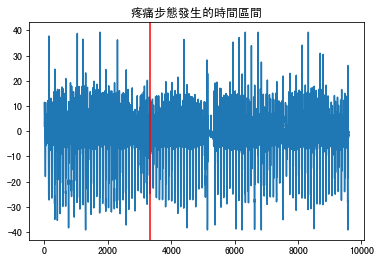

In [13]:
plt.title("疼痛步態發生的時間區間")
plt.plot(listRX1) 
plt.axvline(x=listflag_one[0],c='r')
plt.show()

方法一右腳

(1)疼痛時期-較佳的9步步態週期

抓上面步態的點

In [14]:
#參考網頁:https://sites.google.com/site/zsgititit/home/python-cheng-shi-she-ji/yi-wei-zhen-lie-yu-er-wei-zhen-lie-python

# a為行(直) b為列(橫)
a=5
b=3
big=2
score_one=[[0]*a for i in range(b)]
flagscore=int(flagR_two[0])

#用來記錄轉彎R_turn要用幾步去跑
R_one_number=[]


for i in range(b):
    
    for j in range(a):

                    #因為i、j起始式0所以要+1，-2因為要往後抓
        score_one[i][j]=i+1+flagscore-big,j+1+flagscore
        R_one_score,R_two_score=score_one[i][j]
        R_one_number.append(R_two_score-R_one_score+1)
        #score[i][j]=i+1+flagscore-1-1,j+1+flagscore
    big=big+2
print(score_one)
print("==================")
print(R_one_number)

[[(70, 72), (70, 73), (70, 74), (70, 75), (70, 76)], [(69, 72), (69, 73), (69, 74), (69, 75), (69, 76)], [(68, 72), (68, 73), (68, 74), (68, 75), (68, 76)]]
[3, 4, 5, 6, 7, 4, 5, 6, 7, 8, 5, 6, 7, 8, 9]


In [15]:
flagone=[]
for i in range(b):

    for j in range(a):

        test1,test2=score_one[i][j]
       #print(test1)
        flagone.append(R_gait[R_flag_gait[test1]*2-2])
        #flagfour.append(R_gait[R_flag_gait[test1*2-2]+1])
        #flagfour.append(R_gait[R_flag_gait[test2*2-2]])
        flagone.append(R_gait[R_flag_gait[test2]*2-2+1])
    
# print(len(flagfour))
print(flagone)

[6575, 6881, 6575, 6977, 6575, 7075, 6575, 7173, 6575, 7272, 6472, 6881, 6472, 6977, 6472, 7075, 6472, 7173, 6472, 7272, 6376, 6881, 6376, 6977, 6376, 7075, 6376, 7173, 6376, 7272]


In [16]:
# #抓對應的步態
# for i in range(35,42):
#     # print(R_flag_gait[i])
#     # print(R_flag_gait[i]+1)

#     #因為以0為基準點所以要+1
#     print(i+1)
#     a=R_gait[R_flag_gait[i*2]]
#     b=R_gait[R_flag_gait[i*2]+1]
#     print(a,b)

 

紀錄轉彎

In [17]:
#8
#對應的步態步數
def R_turn(num_turn):
    a = []
    #
    flagR_turn
    Rc_turn=[]
    #n為取多少
    #m為n-1
    #ngait為取多少步態
    ngait=num_turn
    m=ngait-1
    num=0

    for i in range(247):
        a.append(i+1)

    for i in range(len(a)-m):
        Rc_turn.append(0)

    for i in range(len(a) - m):
        b = a[i:ngait + i]
        #print(b)
        jump=0
        for j in range(ngait):
            for k in range(len(flagR_turn)):
                if(jump==1):
                    break  
                jump=0
                if(b[j]==flagR_turn[k]):
                    Rc_turn[i]=(1)
                    jump=1
                    
                

        num=num+1
        #print(num,'window:', b)
    Rc_turn

    Rc_turn_pic=[]
    for i in range(len(listRX1)):
        Rc_turn_pic.append(0)
    #print(listflag_Record)


    for i in range(0,len(listflag_Record),2):
        print(listflag_Record[i])
        print(listflag_Record[i+1])
        print("=================================")
        for l in range(len(listRX1)):
            if(listflag_Record[i]<=l and listflag_Record[i+1]>=l):
                Rc_turn_pic[l]=1
            
    plt.plot(Rc_turn_pic)
    return Rc_turn_pic

紀錄疼痛

In [18]:
#8
def R_one(num_one):
    #對應的步態步數
    a = []
    #
    flagR_one
    Rc_one=[]
    #n為取多少
    #m為n-1
    #ngait為取多少步態
    ngait=num_one
    m=ngait-1
    num=0

    for i in range(247):
        a.append(i+1)

    for i in range(len(a)-m):
        Rc_one.append(0)

    for i in range(len(a) - m):
        b = a[i:ngait + i]
        #print(b)
        jump=0
        for j in range(ngait):
            for k in range(len(flagR_one)):
                if(jump==1):
                    break  
                jump=0
                if(b[j]==flagR_one[k]):
                    Rc_one[i]=(1)
                    jump=1
                    
                

        num=num+1
        #print(num,'window:', b)
    Rc_one

    Rc_one_pic=[]
    for i in range(len(listRX1)):
        Rc_one_pic.append(0)
    #print(listflag_Record)


    for i in range(0,len(listflag_one),2):
        # print(listflag_one[i])
        # print(listflag_one[i+1])
        # print("=================================")
        for l in range(len(listRX1)):
            if(listflag_one[i]==l):
                Rc_one_pic[l]=1
            
          
    #plt.plot(Rc_one_pic)
    return Rc_one_pic

In [19]:

#對應的步態步數
a = []
#
flagR_one
Rc_one=[]
#n為取多少
#m為n-1
#ngait為取多少步態
ngait=30
m=ngait-1
num=0

for i in range(247):
    a.append(i+1)

for i in range(len(a)-m):
    Rc_one.append(0)

for i in range(len(a) - m):
    b = a[i:ngait + i]
    #print(b)
    jump=0
    for j in range(ngait):
        for k in range(len(flagR_one)):
            if(jump==1):
                break  
            jump=0
            if(b[j]==flagR_one[k]):
                Rc_one[i]=(1)
                jump=1
                
            

    num=num+1
    #print(num,'window:', b)
Rc_one

Rc_one_pic=[]
for i in range(len(listRX1)):
    Rc_one_pic.append(0)
#print(listflag_Record)


for i in range(0,len(listflag_one),2):
    # print(listflag_one[i])
    # print(listflag_one[i+1])
    # print("=================================")
    for l in range(len(listRX1)):
        if(listflag_one[i]==l):
            Rc_one_pic[l]=1
        
        
#plt.plot(Rc_one)


右腳不痛9步

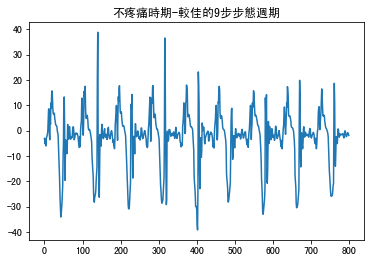

800


In [20]:
#print(R_gait[:14])
plt.title("不疼痛時期-較佳的9步步態週期")
plt.plot(listRX1[897:1697]) 
#plt.axvline(x=listflag_one[0],c='r')
plt.show()
RX_nopain=[]
RY_nopain=[]
RZ_nopain=[]
#Rrss_nopain=[]


GRX_nopain=[]
GRY_nopain=[]
GRZ_nopain=[]
GRrss_nopain=[]

for i in (listRX1[897:1697]):
    RX_nopain.append(i)

for i in (listRY1[897:1697]):
    RY_nopain.append(i)

for i in (listRZ1[897:1697]):
    RZ_nopain.append(i)


# for i in (listGRX[897:1697]):
#     GRX_nopain.append(i)

# for i in (listGRY[897:1697]):
#     GRY_nopain.append(i)

# for i in (listGRZ[897:1697]):
#     GRZ_nopain.append(i)


#print(RX_nopain[0])
#print(RY_nopain[0])
#print(RZ_nopain[0])

Rrss_nopain=np.sqrt((np.array(RX_nopain) ** 2) + (np.array(RY_nopain)** 2) + (np.array(RZ_nopain)** 2))
print(len(Rrss_nopain))

一級疼痛

In [21]:
RX_pain_one=[]
RY_pain_one=[]
RZ_pain_one=[]
p1=1
p2=1
flag_diff_one=[]
for i in range (0,30,2):

    a_gait=flagone[i]
    b_gait=flagone[i+1]
    flag_diff_one.append(flagone[i+1]-flagone[i])
#=========================================================================================    
    #印出圖片用
    # if(p2==5):
    #     plt.title("疼痛時期"+str(p1)+"-1-"+str(p2))
    #     plt.savefig("疼痛時期"+str(p1)+"-1-"+str(p2), dpi=750,facecolor='white')
    #     p1=p1+1
    #     p2=1
    # else:
    #     plt.title("疼痛時期"+str(p1)+"-1-"+str(p2))
    #     plt.savefig("疼痛時期"+str(p1)+"-1-"+str(p2), dpi=750,facecolor='white')
    #     p2=p2+1
    
    # plt.plot(listRX1[a_gait:b_gait]) 
    # #plt.axvline(x=listflag_one[0],c='r')
    # plt.show()
#=========================================================================================
    #Rrss_pain=[]

    # GRX_pain=[]
    # GRY_pain=[]
    # GRZ_pain=[]
    # GRrss_pain=[]

    for i in (listRX1[a_gait:b_gait]):
        RX_pain_one.append(i)

    for i in (listRY1[a_gait:b_gait]):
        RY_pain_one.append(i)

    for i in (listRZ1[a_gait:b_gait]):
        RZ_pain_one.append(i)    


    # for i in (listGRX[a_gait:b_gait]):
    #     GRX_pain.append(i)

    # for i in (listGRY[a_gait:b_gait]):
    #     GRY_pain.append(i)

    # for i in (listGRZ[a_gait:b_gait]):
    #     GRZ_pain.append(i)    



    # for i in range(b_gait-a_gait):
    #     test=np.sqrt((RX_pain[i] ** 2) + (RY_pain[i] ** 2) + (RZ_pain[i] ** 2))
    #     Rrss_pain.append(test)

   
    Rrss_pain_one=np.sqrt((np.array(RX_pain_one) ** 2) + (np.array(RY_pain_one)** 2) + (np.array(RZ_pain_one)** 2))
    
    # for i in range(b_gait-a_gait):
    #     test=np.sqrt((GRX_pain[i] ** 2) + (GRY_pain[i] ** 2) + (GRZ_pain[i] ** 2))
    #     GRrss_pain.append(test)


print(len(RX_pain_one))
print(len(Rrss_pain_one))
flag_diff_one

9019
9019


[306, 402, 500, 598, 697, 409, 505, 603, 701, 800, 505, 601, 699, 797, 896]

判斷疼痛和不疼痛的相關性(越低越好)

In [22]:
# def lowncc(b,c):
#     #print(len(b))
#     #print(len(c))
#     if(len(b)<len(c)):
#         a=len(b)
#     else :
#         a=len(c)
#     #print(a)


#     RX1=pd.Series(b[:a+1])
#     RX2=pd.Series(c[:a+1])

#     #皮爾森公式 https://reurl.cc/RXzEqx
#     #print("Pearson套件相關係數:"+str(round(X.corr(Y,method='pearson'),2))) 
#     PCCRX=str(round(RX1.corr(RX2,method='pearson'),3))

#     #print("PCCRX 第"+str(time)+"次"+str(PCCRX))
#     #print("PCCRY 第"+str(time)+"次"+str(PCCRY))
#     #print("PCCRZ 第"+str(time)+"次"+str(PCCRZ)+"\n")

#     #將數值轉float https://zhuanlan.zhihu.com/p/260434441
#     f=abs(float(PCCRX))
#     #print(f)
#     RX=f
#     print(RX)
#     print("相關性為"+str(RX))
    



# def dolowncc(one):
#     star=0
#     for i in range(len(flag_diff)):
       
       
#         if(i==0):
#             lowncc(one,RX_pain[:flag_diff[i]])
#             lowncc(one,RY_pain[:flag_diff[i]])
#             lowncc(one,RZ_pain[:flag_diff[i]])
#             lowncc(one,Rrss_pain[:flag_diff[i]])

#             #lowncc(one,LX_pain[:flag_diff[i]])
#             # lowncc(one,LY_pain[:flag_diff[i]])
#             # lowncc(one,LZ_pain[:flag_diff[i]])
#             # lowncc(one,Lrss_pain[:flag_diff[i]])
#         else:
#             lowncc(one,RX_pain[star:star+flag_diff[i]])
#             lowncc(one,RY_pain[star:star+flag_diff[i]])
#             lowncc(one,RZ_pain[star:star+flag_diff[i]])
#             lowncc(one,Rrss_pain[star:star+flag_diff[i]])

#             # lowncc(one,LX_pain[star:star+flag_diff[i]])
#             # lowncc(one,LY_pain[star:star+flag_diff[i]])
#             # lowncc(one,LZ_pain[star:star+flag_diff[i]])
#             # lowncc(one,Lrss_pain[star:star+flag_diff[i]])


#             # print(star)
#             # print(star+flag_diff[i])
        
#         star=flag_diff[i]+star

    


# dolowncc(RX_nopain)
# dolowncc(RY_nopain)
# dolowncc(RZ_nopain)
# dolowncc(Rrss_nopain)
# dolowncc(LX_nopain)
# dolowncc(LY_nopain)
# dolowncc(LZ_nopain)
# dolowncc(Lrss_nopain)
# dolowncc(LZ_nopain)





方法一左腳

In [23]:
# #計算疼痛次數
# flagL_one=[]
# for i in range(0,len(L_gait)-1,2):
#     for j in range (len(listflag_one)):
#         if(L_gait[i]<=listflag_one[j] and L_gait[i+1]>= listflag_one[j]) :
#             # print("R_gait[i]")
#             # print(R_gait[i])

#             # print("R_gait[i+1]")
#             # print(R_gait[i+1])

#             # print("listflag_Record[j]")
#             # print(listflag_Record[j])

#             # print("listflag_Record[j+1]")
#             # print(listflag_Record[j+1])
#             # print("==============================================")
            
#             #因為都是兩步紀錄,所以要/2
#             flagL_one.append(i/2+1)
#             print(listflag_one[j])
            
#             # print("flagabc")
#             # print(flagabc)
#             # print("*********************************************")
# print("左腳的哪一點會碰到一級疼痛")             
# print(flagL_one)       
            

   

In [24]:
# plt.title("疼痛步態發生的時間區間")
# plt.plot(listLX1) 
# plt.axvline(x=listflag_one[0],c='r')
# plt.show()

(1)不疼痛時期-較佳的7步步態週期

In [25]:
# #print(R_gait[:14])
# plt.title("不疼痛時期-較佳的7步步態週期")
# plt.plot(listLX1[133:867]) 
# #plt.axvline(x=listflag_one[0],c='r')
# plt.show()
# LX_nopain=[]
# LY_nopain=[]
# LZ_nopain=[]
# Lrss_nopain=[]


# GLX_nopain=[]
# GLY_nopain=[]
# GLZ_nopain=[]
# GLrss_nopain=[]

# for i in (listLX1[133:867]):
#     LX_nopain.append(i)

# for i in (listLY1[133:867]):
#     LY_nopain.append(i)

# for i in (listLZ1[133:867]):
#     LZ_nopain.append(i)


# for i in (listGLX[133:867]):
#     GLX_nopain.append(i)

# for i in (listGLY[133:867]):
#     GLY_nopain.append(i)

# for i in (listGLZ[133:867]):
#     GLZ_nopain.append(i)


# #print(RX_nopain[0])
# #print(RY_nopain[0])
# #print(RZ_nopain[0])

# for i in range(734):
#    test=np.sqrt((LX_nopain[i] ** 2) + (LY_nopain[i] ** 2) + (LZ_nopain[i] ** 2))
#    Lrss_nopain.append(test)
# #print(Rrss_nopain[0])

In [26]:
# # print(L_gait[64])
# # print(L_gait[77])
# plt.title("疼痛時期-痛前2+痛3+痛後2")
# plt.plot(listLX1[3399:4133]) 
# #plt.axvline(x=listflag_one[0],c='r')
# plt.show()
# LX_pain=[]
# LY_pain=[]
# LZ_pain=[]
# Lrss_pain=[]

# GLX_pain=[]
# GLY_pain=[]
# GLZ_pain=[]
# GLrss_pain=[]

# for i in (listLX1[3399:4088]):
#     LX_pain.append(i)

# for i in (listLY1[3399:4088]):
#     LY_pain.append(i)

# for i in (listLZ1[3399:4088]):
#     LZ_pain.append(i)    


# for i in (listGLX[3399:4088]):
#     GLX_pain.append(i)

# for i in (listGLY[3399:4088]):
#     GLY_pain.append(i)

# for i in (listGLZ[3399:4088]):
#     GLZ_pain.append(i)    


# for i in range(689):
#    test=np.sqrt((LX_pain[i] ** 2) + (LY_pain[i] ** 2) + (LZ_pain[i] ** 2))
#    Lrss_pain.append(test)

# for i in range(689):
#    test=np.sqrt((GLX_pain[i] ** 2) + (GLY_pain[i] ** 2) + (GLZ_pain[i] ** 2))
#    GLrss_pain.append(test)

In [27]:
def one_plot(all,pain):
    # all=50
    # pain=10

    one_plot=[]
    one_plot_flag=0
    one_plot_start=[]
    one_plot_end=[]
    # pain=20
    a=[]
    n=pain
    m=n-1

    # print(all)
    # print(pain)
    for i in range(all):
        a.append(i+1)
    #print(listflag_one)

    for i in range(all-m):
        b=a[i:n+i]
    #print(b)
        one_plot_flag=0

        #紀錄一級疼痛
        for j in b:
            for k in listflag_two:
                if(j==k):
                    one_plot_flag=1
                    break 

        if(one_plot_flag==0):
            one_plot.append(0)
        else:
            one_plot.append(1)
           
    for i in range(len (one_plot)-1):
            if(one_plot[i]==1 and one_plot[i-1]==0):
                one_plot_start.append(1)
            else:
                one_plot_start.append(0)

            if(one_plot[i]==1 and one_plot[i+1]==0):
                one_plot_end.append(1)
            else:
                one_plot_end.append(0)
    one_plot_start=np.where(np.array(one_plot_start)==1)[0]
    one_plot_end=np.where(np.array(one_plot_end)==1)[0]
    #one_plot=np.where(np.array(one_plot)==1)[0]




    # print("one_plot_start")
    # print(one_plot_start)
    # print("\n")
    # print("one_plot_end")
    # print(one_plot_end)
    # print("\n")
    return one_plot_start,one_plot_end

NCC函式

In [48]:
R_flag=[]
#NCC
def NormaliseCrossCorrelation(a,v):
    M = len(a)
    N = len(v)

    if type(a) is list: 
        a = np.array(a)
    if type(v) is list: 
        v = np.array(v)
    
    v_mu = np.mean(v)

    ncc_series = []
    for i in range(M-N+1):
        _a = a[i:i+N]
        a_sum = _a - np.mean(_a)
        v_sum = v - v_mu
        nr = 1/N * np.sum(a_sum*v_sum) / np.sqrt(np.var(_a)*np.var(v))
        ncc_series.append(nr)

    return ncc_series

#A>B pname:圖片名稱備註 All:完整訊號 pain:疼痛7步訊號 nopain:不痛7步訊號 flag:那訊號的切割線(區分疼痛開始的訊號線),listdouble:計算重複點
def run_ncc(allname,pname,all,pain,nopain,find,listdouble):


    
    RX_pain_plot=NormaliseCrossCorrelation(all,pain)
    one_plot_start,one_plot_end=one_plot(len(all),len(pain))
    #print(oneplot)
    #print(len(RX_pain_plot))
    #RX_pain_plot=NormaliseCrossCorrelation(listRX1,RX_pain)
    # for i in range(len(RX_pain_plot)):
    #     if(RX_pain_plot[i]<0):
    #         RX_pain_plot[i]=RX_pain_plot[i]*-1   

    #print(RX_pain_plot)
    


    # print("\n疼痛最大")
    # print(max(RX_pain_plot))
    # print("疼痛平均")
    # print(np.average(RX_pain_plot))


    #plt.show()
    # print(pname)
    # print(one_plot_start)
    # print(one_plot_end)
    plt.title("("+str(find)+")疼痛Pattern 對上"+allname+"的相關性")
    # plt.plot(RX_pain_plot)
    # for i in range(len (one_plot_end)):
    #     if(i==0):
    #         plt.axvline(x=one_plot_start[i],c='orange', linestyle="--",label='one')
    #         plt.axvline(x=one_plot_end[i],c='orange', linestyle="--")            
    #     else:
    #         plt.axvline(x=one_plot_start[i],c='orange', linestyle="--")
    #         plt.axvline(x=one_plot_end[i],c='orange', linestyle="--")
    #                             #plt.axvline(x=flag,c='r')
    #                             #plt.plot(Rc_turn_pic)
    #                             #plt.plot(Rc_one_pic)
    #                             #plt.savefig("("+str(find)+")"+pname+'疼痛.png', dpi=750,facecolor='white')
    #                             #plt.axvline(x=listflag_one[0],c='r')
    #                             #plt.axvline(x=3446,c='r')
    # plt.show()

    #RX_pain_plot= savgol_filter(RX_pain_plot,30,6)
    RX_pain_plot=np.array(RX_pain_plot)
    RX_pain_plot_peaks, _= find_peaks(RX_pain_plot,height=0.5,distance=80)
    plt.plot(RX_pain_plot)
    plt.plot(RX_pain_plot_peaks, RX_pain_plot[RX_pain_plot_peaks],"*")
    for i in range(len (one_plot_end)):
        if(i==0):
            plt.axvline(x=one_plot_start[i],c='r', linestyle="--",label='one')
            plt.axvline(x=one_plot_end[i],c='r', linestyle="--")            
        else:
            plt.axvline(x=one_plot_start[i],c='r', linestyle="--")
            plt.axvline(x=one_plot_end[i],c='r', linestyle="--")
    #plt.savefig("("+str(find)+")疼痛Pattern 對上"+allname+"的相關性", dpi=750,facecolor='white')
    plt.show()
    
    #計算重複點
    for i in range(len(RX_pain_plot_peaks)):
        listdouble[RX_pain_plot_peaks[i]]=listdouble[RX_pain_plot_peaks[i]]+1   


    #==================================不痛===========================================
    if(find==1): 
        RX_nopain_plot=NormaliseCrossCorrelation(all,nopain)
        #RX_nopain_plot=NormaliseCrossCorrelation(listRX1,RX_nopain)
        for i in range(len(RX_nopain_plot)):
            if(RX_nopain_plot[i]<0):
                RX_nopain_plot[i]=RX_nopain_plot[i]*-1
        # print("\n不痛最大")
        # print(max(RX_nopain_plot))
        # print("不痛平均")
        # print(np.average(RX_nopain_plot)) 
        # print("=====================================================================")




        print(pname)
        plt.title("不痛Pattern 對上"+allname+"的相關性")
        plt.plot(RX_nopain_plot)
        #plt.axvline(x=flag,c='r')
        #plt.plot(Rc_turn_pic)
       # plt.plot(Rc_one_pic)
        
        #plt.savefig(pname+'不疼痛.png', dpi=750,facecolor='white')
        #plt.axvline(x=listflag_one[0],c='r')
        #plt.axvline(x=63,c='r')
        plt.show()



#=======================範例===========================================
# allname=' 右腳X'   

# pname='右腳X特徵'
# run_ncc(allname,pname,listRX1,RX_pain,RX_nopain,listflag_one[0])
# pname='右腳Y特徵'
# run_ncc(allname,pname,listRX1,RY_pain,RY_nopain,listflag_one[0])
# pname='右腳Z特徵'
# run_ncc(allname,pname,listRX1,RZ_pain,RZ_nopain,listflag_one[0])
# pname='右腳RSS特徵'
# run_ncc(allname,pname,listRX1,Rrss_pain,Rrss_nopain,listflag_one[0])

In [49]:
# #陣列起始點
# flag_a=0
# #陣列起始點
# flag_b=0
# #判斷用，第一次將起點設為0
# flag_c=0
# flag_test=0
# flag_test1=[]
# for i in flag_diff:
#     #print(i)
#     flag_test=0
#     if(flag_c==0):
#         flag_a=0
#         flag_b=i
#     else:
#         flag_b=i+flag_a
#     print(flag_a)    
#     print(flag_b)
#     print("=========================")    
#     flag_c=flag_c+1

#     for j in range(flag_a,flag_b,1):
#         flag_test=flag_test+1
#         #print(j)
#     flag_test1.append(flag_test)
#     flag_a=i+1
# print(flag_test1)
    

執行開始

In [50]:
def doncc(allname,one):
    
    #計算重複點陣列大小為讀取的總長
    listdouble=[]
    for i  in range(len(listRX1)):
        listdouble.append(0)

    #抓頭尾點用
    star=0
    
    #為了只印出一次不痛圖案
    find=["1-1-1","1-1-2","1-1-3","1-1-4","1-1-5","2-1-1","2-1-2","2-1-3","2-1-4","2-1-5","3-1-1","3-1-2","3-1-3","3-1-4","3-1-5",]
    for i in range(len(flag_diff_one)):
       
        
        if(i==0):
            pname='右腳X特徵'
            # Rc_one_pic=R_one(R_one_number[i])
            # print(R_one_number[i])
            #Rc_turn_pic=R_turn(R_turn_number[i])
            run_ncc(allname,pname,one,RX_pain_one[:flag_diff_one[i]],RX_nopain,find[i],listdouble)
            # pname='右腳Y特徵'
            # run_ncc(allname,pname,one,RY_pain[:flag_diff[i]],RY_nopain,listflag_one[0],find)
            # pname='右腳Z特徵'
            # run_ncc(allname,pname,one,RZ_pain[:flag_diff[i]],RZ_nopain,listflag_one[0])
            # pname='右腳RSS特徵'
            # run_ncc(allname,pname,one,Rrss_pain[:flag_diff[i]],Rrss_nopain,listflag_one[0])




        else:
            pname='右腳X特徵'
            #print(R_one_number[i])
            run_ncc(allname,pname,one,RX_pain_one[star:star+flag_diff_one[i]],RX_nopain,find[i],listdouble)
            # print(star)
            # print(star+flag_diff[i])
        star=flag_diff_one[i]+star
        
    


    
    # pname='左腳X特徵'
    # run_ncc(allname,pname,one,LX_pain,LX_nopain,listflag_one[0])
    # pname='左腳Y特徵'
    # run_ncc(allname,pname,one,LY_pain,LY_nopain,listflag_one[0])
    # pname='左腳Z特徵'
    # run_ncc(allname,pname,one,LZ_pain,LZ_nopain,listflag_one[0])
    # pname='左腳RSS特徵'
    # run_ncc(allname,pname,one,Lrss_pain,Lrss_nopain,listflag_one[0])
    return listdouble



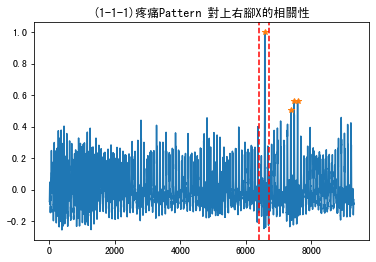

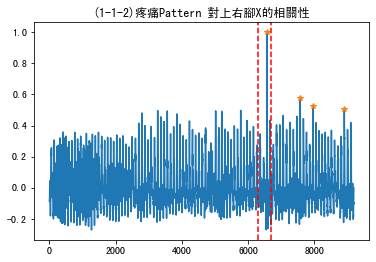

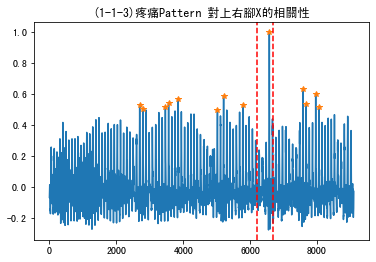

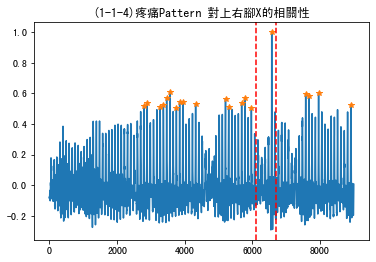

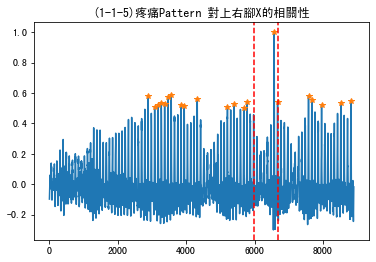

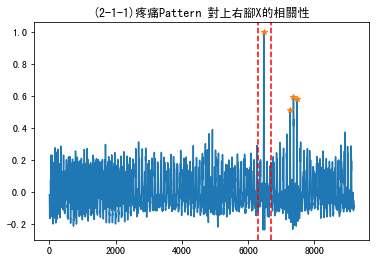

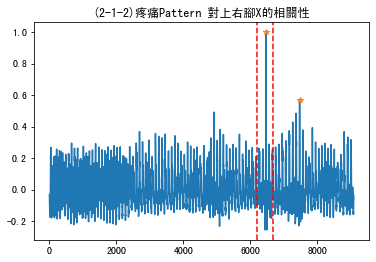

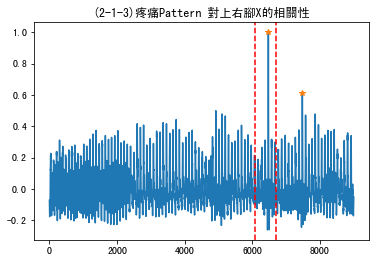

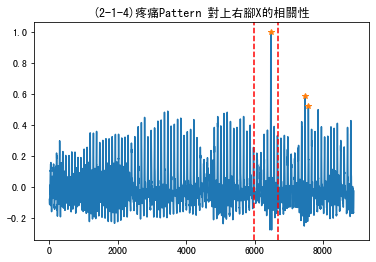

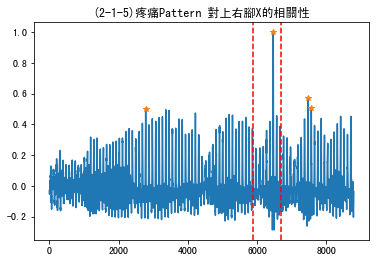

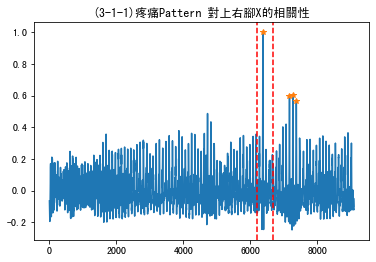

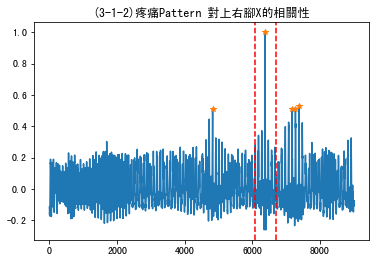

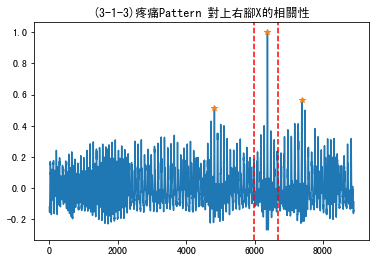

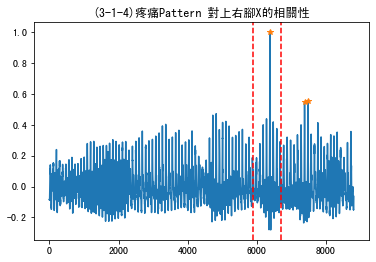

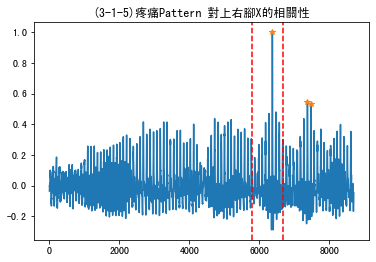

6376
5
6472
5
6575
5
7476
4
7961
4


In [51]:
name="右腳X"
listdouble=doncc(name,listRX1)
# name="右腳Y"
# doncc(name,listRY1)
# name="右腳Z"
# doncc(name,listRZ1)
# name="右腳RSS"
# doncc(name,listRrss)
for i in range(len(listdouble)):
    if(listdouble[i]>3):
        print(i)
        print(listdouble[i])


# name="左腳X"
# doncc(name,listLX1)

# name="左腳Y"
# doncc(name,listLY1)
# name="左腳Z"
# doncc(name,listLZ1)
# name="左腳RSS"
# doncc(name,listLrss)

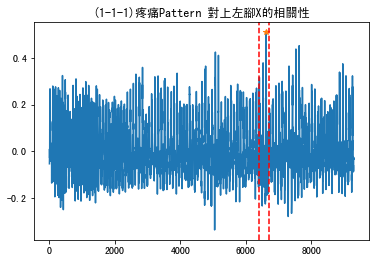

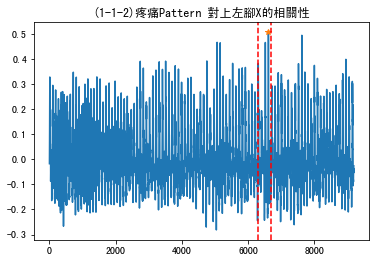

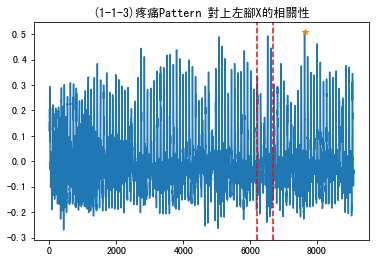

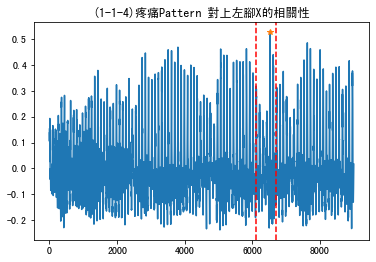

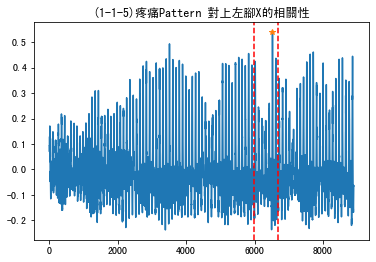

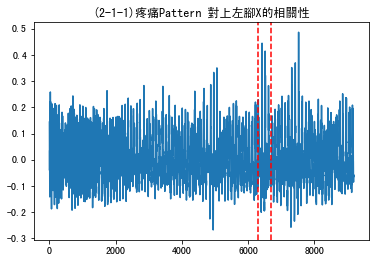

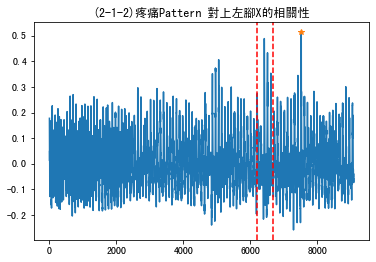

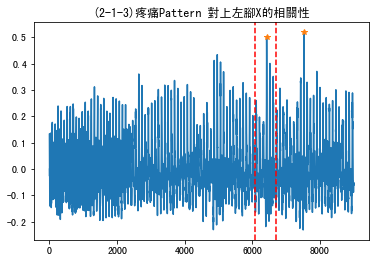

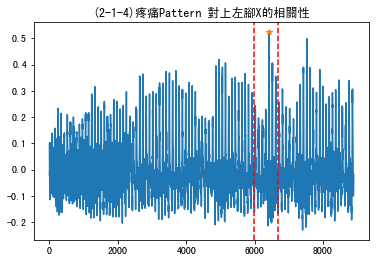

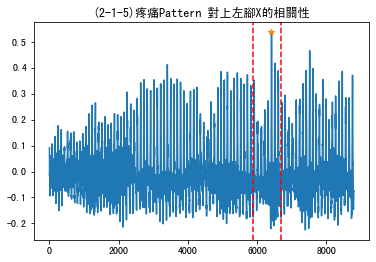

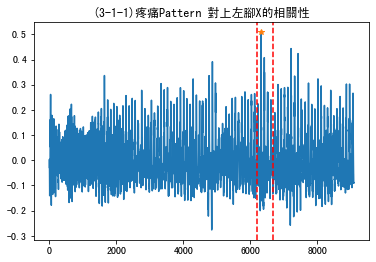

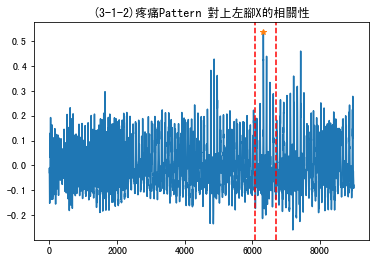

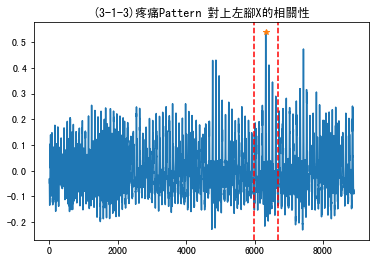

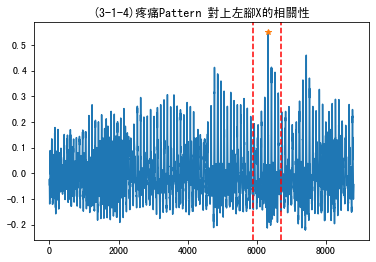

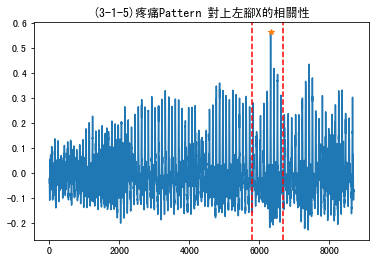

6325
5


In [52]:
name="左腳X"
listdouble=doncc(name,listLX1)

for i in range(len(listdouble)):
    if(listdouble[i]>3):
        print(i)
        print(listdouble[i])

In [42]:

def NormaliseCrossCorrelation(a,v):
    M = len(a)
    N = len(v)

    if type(a) is list: 
        a = np.array(a)
    if type(v) is list: 
        v = np.array(v)
    
    v_mu = np.mean(v)

    ncc_series = []
    for i in range(M-N+1):
        _a = a[i:i+N]
        a_sum = _a - np.mean(_a)
        v_sum = v - v_mu
        nr = 1/N * np.sum(a_sum*v_sum) / np.sqrt(np.var(_a)*np.var(v))
        ncc_series.append(nr)

    return ncc_series



def NormaliseCrossConvolution(a,v):
    M = len(a)
    N = len(v)

    if type(a) is list: 
        a = np.array(a)
    if type(v) is list: 
        v = np.array(v)
    
    v_mean = np.mean(v)
    v_normalized = v - v_mean
    a_normalized = a - np.mean(a)
    corr = np.convolve(a_normalized, v_normalized[::-1], mode='valid')
    corr /= np.sqrt(np.sum(np.square(a_normalized)) * np.sum(np.square(v_normalized)))
    return corr






#A>B pname:圖片名稱備註 All:完整訊號 pain:疼痛7步訊號 nopain:不痛7步訊號 flag:那訊號的切割線(區分疼痛開始的訊號線),listdouble:計算重複點
def run_ncc(allname,pname,all,pain,nopain,find,listdouble):


    
    RX_pain_plot=NormaliseCrossCorrelation(all,pain)
    cRX_pain_plot=NormaliseCrossConvolution(all,pain)
    one_plot_start,one_plot_end=one_plot(len(all),len(pain))
    #print(oneplot)
    #print(len(RX_pain_plot))
    #RX_pain_plot=NormaliseCrossCorrelation(listRX1,RX_pain)
    for i in range(len(RX_pain_plot)):
        if(RX_pain_plot[i]<0):
            RX_pain_plot[i]=RX_pain_plot[i]*-1   

    for i in range(len(cRX_pain_plot)):
        if(cRX_pain_plot[i]<0):
            cRX_pain_plot[i]=cRX_pain_plot[i]*-1   

    #print(RX_pain_plot)
    


    # print("\n疼痛最大")
    # print(max(RX_pain_plot))
    # print("疼痛平均")
    # print(np.average(RX_pain_plot))


    #plt.show()
    # print(pname)
    # print(one_plot_start)
    # print(one_plot_end)
    plt.title("correlation")
    # plt.plot(RX_pain_plot)
    # for i in range(len (one_plot_end)):
    #     if(i==0):
    #         plt.axvline(x=one_plot_start[i],c='orange', linestyle="--",label='one')
    #         plt.axvline(x=one_plot_end[i],c='orange', linestyle="--")            
    #     else:
    #         plt.axvline(x=one_plot_start[i],c='orange', linestyle="--")
    #         plt.axvline(x=one_plot_end[i],c='orange', linestyle="--")
    #                             #plt.axvline(x=flag,c='r')
    #                             #plt.plot(Rc_turn_pic)
    #                             #plt.plot(Rc_one_pic)
    #                             #plt.savefig("("+str(find)+")"+pname+'疼痛.png', dpi=750,facecolor='white')
    #                             #plt.axvline(x=listflag_one[0],c='r')
    #                             #plt.axvline(x=3446,c='r')
    # plt.show()

    #RX_pain_plot= savgol_filter(RX_pain_plot,30,6)
    RX_pain_plot=np.array(RX_pain_plot)
    RX_pain_plot_peaks, _= find_peaks(RX_pain_plot,height=0.5,distance=80)
    plt.plot(RX_pain_plot)
    plt.plot(RX_pain_plot_peaks, RX_pain_plot[RX_pain_plot_peaks],"*")
    for i in range(len (one_plot_end)):
        if(i==0):
            plt.axvline(x=one_plot_start[i],c='r', linestyle="--",label='one')
            plt.axvline(x=one_plot_end[i],c='r', linestyle="--")            
        else:
            plt.axvline(x=one_plot_start[i],c='r', linestyle="--")
            plt.axvline(x=one_plot_end[i],c='r', linestyle="--")
    #plt.savefig("("+str(find)+")疼痛Pattern 對上"+allname+"的相關性", dpi=750,facecolor='white')
    plt.show()
    
    plt.title("convolution")
    

    RX_pain_plot=np.array(cRX_pain_plot)
    RX_pain_plot_peaks, _= find_peaks(RX_pain_plot,height=0.5,distance=80)
    plt.plot(RX_pain_plot)
    plt.plot(RX_pain_plot_peaks, RX_pain_plot[RX_pain_plot_peaks],"*")
    for i in range(len (one_plot_end)):
        if(i==0):
            plt.axvline(x=one_plot_start[i],c='r', linestyle="--",label='one')
            plt.axvline(x=one_plot_end[i],c='r', linestyle="--")            
        else:
            plt.axvline(x=one_plot_start[i],c='r', linestyle="--")
            plt.axvline(x=one_plot_end[i],c='r', linestyle="--")
    #plt.savefig("("+str(find)+")疼痛Pattern 對上"+allname+"的相關性", dpi=750,facecolor='white')
    plt.show()


    #計算重複點
    for i in range(len(RX_pain_plot_peaks)):
        listdouble[RX_pain_plot_peaks[i]]=listdouble[RX_pain_plot_peaks[i]]+1   


    #==================================不痛===========================================
    if(find==1): 
        RX_nopain_plot=NormaliseCrossCorrelation(all,nopain)
        #RX_nopain_plot=NormaliseCrossCorrelation(listRX1,RX_nopain)
        for i in range(len(RX_nopain_plot)):
            if(RX_nopain_plot[i]<0):
                RX_nopain_plot[i]=RX_nopain_plot[i]*-1
        # print("\n不痛最大")
        # print(max(RX_nopain_plot))
        # print("不痛平均")
        # print(np.average(RX_nopain_plot)) 
        # print("=====================================================================")




        print(pname)
        plt.title("不痛Pattern 對上"+allname+"的相關性")
        plt.plot(RX_nopain_plot)
        #plt.axvline(x=flag,c='r')
        #plt.plot(Rc_turn_pic)
       # plt.plot(Rc_one_pic)
        
        #plt.savefig(pname+'不疼痛.png', dpi=750,facecolor='white')
        #plt.axvline(x=listflag_one[0],c='r')
        #plt.axvline(x=63,c='r')
        plt.show()




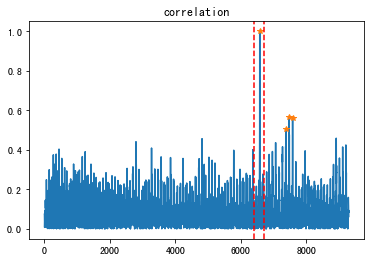

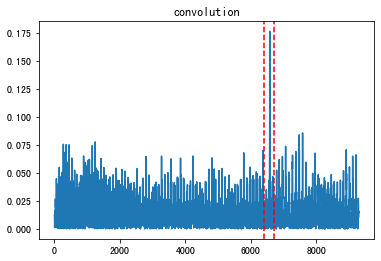

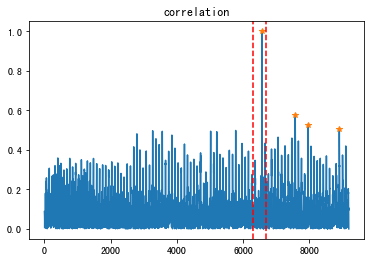

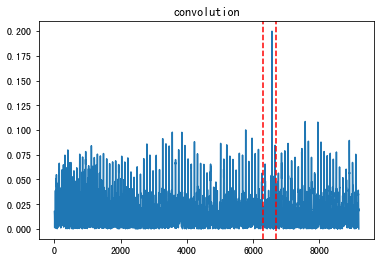

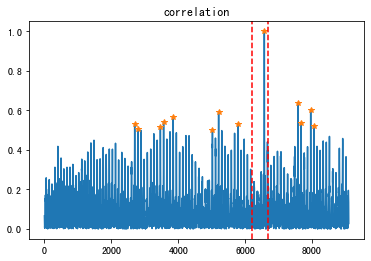

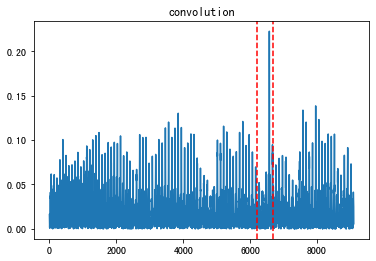

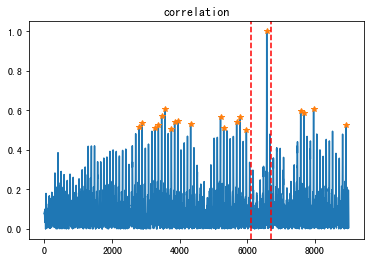

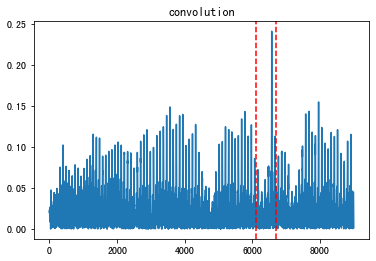

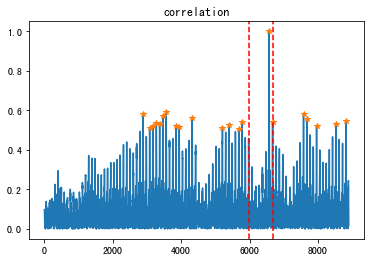

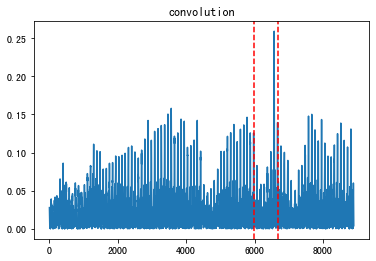

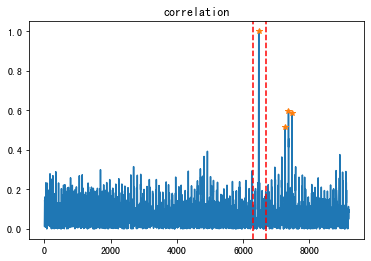

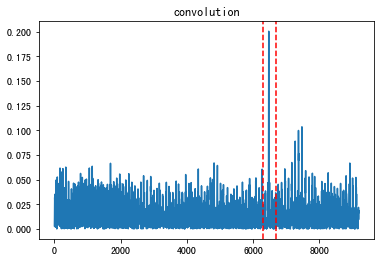

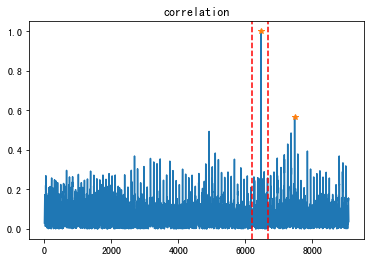

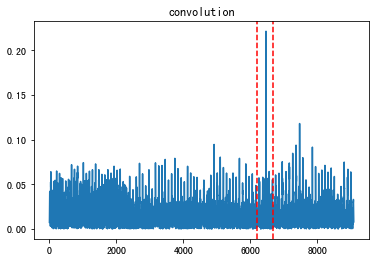

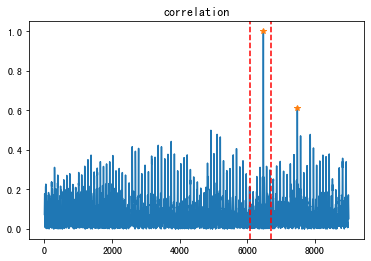

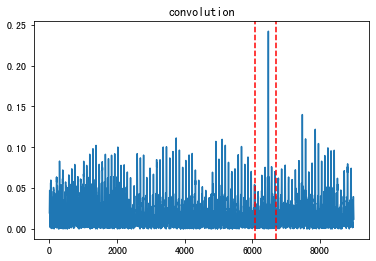

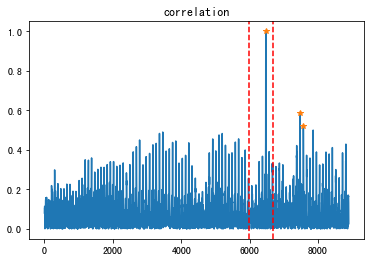

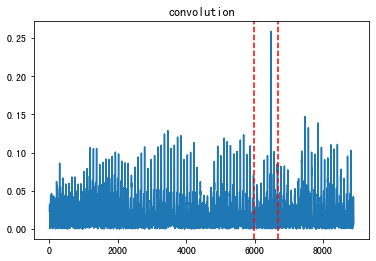

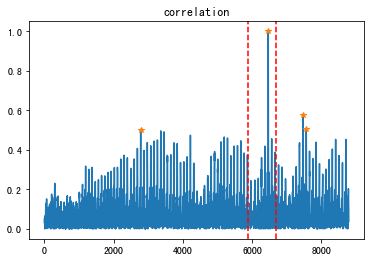

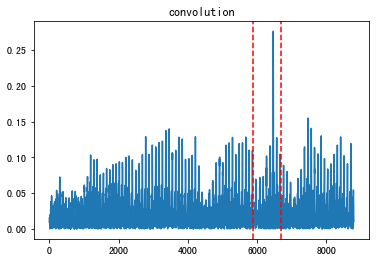

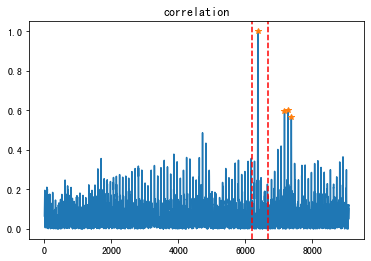

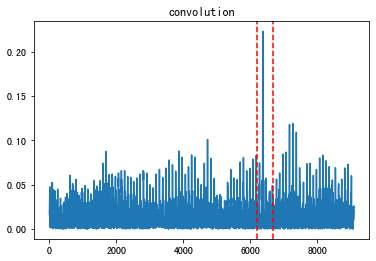

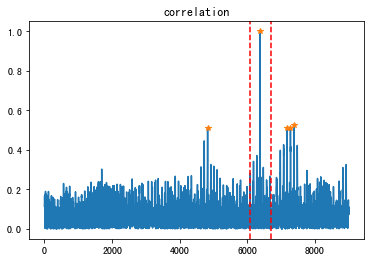

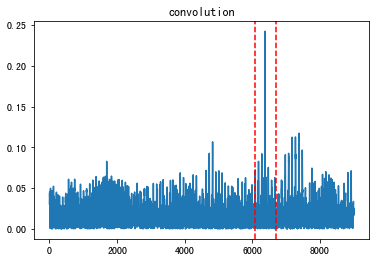

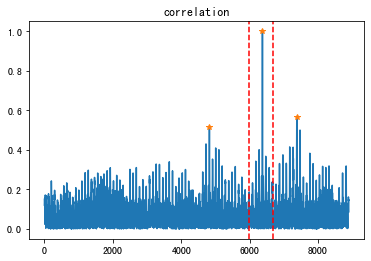

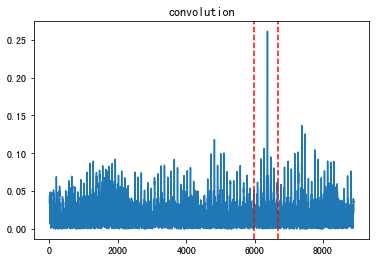

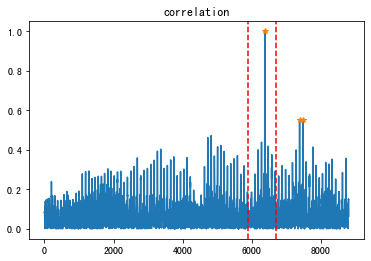

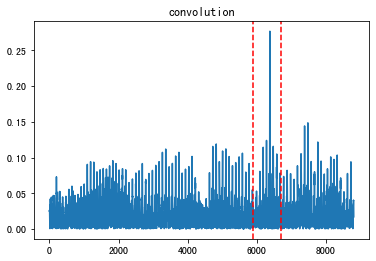

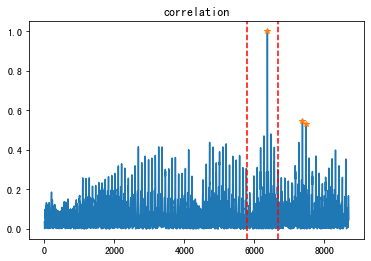

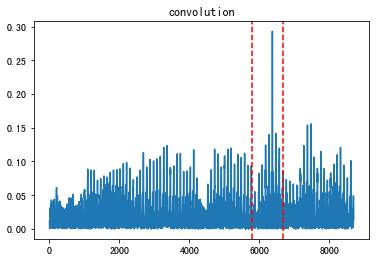

In [43]:
name="右腳X"
listdouble=doncc(name,listRX1)

In [44]:
import numpy as np

# 生成信号 a
np.random.seed(0)
a = np.random.randn(1000)

# 生成模板 v
v = np.zeros(50)
v[10:20] = 1
v[30:40] = -1

# 使用 NormaliseCrossCorrelation 函数计算归一化互相关系数
ncc1 = NormaliseCrossCorrelation(a, v)

# 使用 NormaliseCrossConvolution 函数计算归一化互相关系数
ncc2 = NormaliseCrossConvolution(a, v)

# 比较两个函数计算出的结果
print(np.allclose(ncc1, ncc2))  # True


# 使用 NormaliseCrossCorrelation 函数计算归一化互相关系数
ncc1 = NormaliseCrossCorrelation(a, v)
print('ncc1:', ncc1)

# 使用 NormaliseCrossConvolution 函数计算归一化互相关系数
ncc2 = NormaliseCrossConvolution(a, v)
print('ncc2:', ncc2)

# 比较两个函数计算出的结果
print(np.allclose(ncc1, ncc2))  # False

False


In [46]:

import numpy as np

def NormaliseCrossConvolution(a, v):
    M = len(a)
    N = len(v)

    if type(a) is list: 
        a = np.array(a)
    if type(v) is list: 
        v = np.array(v)
    
    v_mean = np.mean(v)
    v_normalized = v - v_mean
    a_normalized = a - np.mean(a)
    corr = np.correlate(a_normalized, v_normalized, mode='valid')
    corr /= np.sqrt(np.sum(np.square(a_normalized)) * np.sum(np.square(v_normalized)))
    return corr

# 生成信號 a
np.random.seed(0)
a = np.random.randn(1000)

# 生成模板 v
v = np.zeros(50)
v[10:20] = 1
v[30:40] = -1

# 使用 NormaliseCrossConvolution 函数計算归一化互相關系数
ncc = NormaliseCrossConvolution(a, v)

# 輸出結果
print(ncc)

[ 3.43186339e-02  2.36190206e-02  3.07652555e-02  3.73695894e-02
  3.01544194e-03  1.72547575e-02  8.70373284e-03  1.61167532e-02
  1.92894133e-02  3.68144879e-02  5.28180051e-02  7.11208588e-02
  5.62027931e-02  3.50856761e-02  4.86454520e-02  2.64433549e-02
  3.17755524e-02  3.08099906e-02  4.41677859e-02  2.33945764e-02
  1.17770616e-02  1.55762359e-03 -5.97689265e-03 -9.67452350e-03
  2.24001257e-02  1.97684558e-02  2.14569267e-02  1.58233987e-02
  1.16310493e-02  4.79953291e-03  2.47035635e-03 -6.47359636e-03
  2.97125881e-03 -2.45244707e-03 -2.84065088e-02 -2.65685625e-02
 -1.83340518e-02 -1.43228681e-02 -1.02636709e-02 -7.51392799e-03
 -8.61876013e-03  6.54911296e-03 -4.32792471e-03 -1.66725009e-03
 -3.41692275e-03 -9.72337393e-03 -3.41583012e-02 -6.09965960e-02
 -6.27060209e-02 -5.92227321e-02 -6.34036189e-02 -5.88217057e-02
 -5.76259152e-02 -4.17940294e-02 -5.62754476e-02 -4.65553750e-02
 -4.00627706e-02 -2.62529394e-02 -4.77980333e-02 -5.21101571e-02
 -4.74057102e-02 -7.73551

In [47]:
# 使用 NormaliseCrossCorrelation 函数计算归一化互相关系数
ncc1 = NormaliseCrossCorrelation(a, v)

# 使用 NormaliseCrossConvolution 函数计算归一化互相关系数
ncc2 = NormaliseCrossConvolution(a, v)

print(np.allclose(ncc1, ncc2)) 

False


右腳陀螺儀用加速度特徵

In [ ]:

    # lowncc(one,GRX_pain)
    # lowncc(one,GRY_pain)
    # lowncc(one,GRZ_pain)
    # lowncc(one,GLX_pain)
    # lowncc(one,GLY_pain)
    # lowncc(one,GLZ_pain)
    # lowncc(one,GRrss_pain)
    # lowncc(one,GLrss_pain)


allname=' (G)右腳X'    
pname='右腳X特徵'
run_ncc(allname,pname,listGRX,RX_pain,RX_nopain,listflag_one[0])
pname='右腳Y特徵'
run_ncc(allname,pname,listGRX,RY_pain,RY_nopain,listflag_one[0])
pname='右腳Z特徵'
run_ncc(allname,pname,listGRX,RZ_pain,RZ_nopain,listflag_one[0])
pname='右腳RSS特徵'
run_ncc(allname,pname,listGRX,Rrss_pain,Rrss_nopain,listflag_one[0])


allname=' (ACC)右腳Y'    
pname='右腳X特徵'
run_ncc(allname,pname,listGRY,RX_pain,RX_nopain,listflag_one[0])
pname='右腳Y特徵'
run_ncc(allname,pname,listGRY,RY_pain,RY_nopain,listflag_one[0])
pname='右腳Z特徵'
run_ncc(allname,pname,listGRY,RZ_pain,RZ_nopain,listflag_one[0])
pname='右腳RSS特徵'
run_ncc(allname,pname,listGRY,Rrss_pain,Rrss_nopain,listflag_one[0])

allname=' (ACC)右腳Z'    
pname='右腳X特徵'
run_ncc(allname,pname,listGRZ,RX_pain,RX_nopain,listflag_one[0])
pname='右腳Y特徵'
run_ncc(allname,pname,listGRZ,RY_pain,RY_nopain,listflag_one[0])
pname='右腳Z特徵'
run_ncc(allname,pname,listGRZ,RZ_pain,RZ_nopain,listflag_one[0])
pname='右腳RSS特徵'
run_ncc(allname,pname,listGRZ,Rrss_pain,Rrss_nopain,listflag_one[0])

allname=' 右腳RSS'  
pname='右腳RSS特徵'
run_ncc(allname,pname,listRrss,Rrss_pain,Rrss_nopain,listflag_one[0])

In [ ]:
# First signal 
sig1 = np.sin(np.r_[-1:1:0.1])

# Seconds signal with pi/4 phase shift. Half the size of sig1
sig2 = np.sin(np.r_[-1:0:0.1] + np.pi/4)
test=NormaliseCrossCorrelation(sig1,sig2)
print(test)

sig1=listLZ1
sig2=LX_pain
corr = (len(sig1) - len(sig2) + 1) * [0]

# Go through lag components one-by-one
for l in range(len(corr)):
    corr[l] =abs(sum([sig1[i+l] * sig2[i] for i in range(len(sig2))])) 

#print(corr)

後續未做

術後

In [ ]:
df = pd.read_excel("李O貴3術後.xlsx",keep_default_na=False)
listRX3=[]
listRX3=df.RightFoot_X.tolist()
listRX3 = [i for i in listRX3 if i != '']

df = pd.read_excel("李O貴4術後.xlsx",keep_default_na=False)
listRX4=[]
listRX4=df.RightFoot_X.tolist() 
listRX4 = [i for i in listRX4 if i != '']
 





In [ ]:
run_ncc(listRX1,RX_pain,RX_nopain,listflag_one[0])
RX_pain_plot=NormaliseCrossCorrelation(listRX3,RX_pain)
for i in range(len(RX_pain_plot)):
    if(RX_pain_plot[i]<0):
        RX_pain_plot[i]=RX_pain_plot[i]*-1       
plt.title("疼痛Pattern 對上 全部波型的相關性")
plt.plot(RX_pain_plot)
#plt.axvline(x=listflag_one[0],c='r')
#plt.axvline(x=3446,c='r')
plt.show()


RX_nopain_plot=NormaliseCrossCorrelation(listRX3,RX_nopain)
for i in range(len(RX_nopain_plot)):
    if(RX_nopain_plot[i]<0):
        RX_nopain_plot[i]=RX_nopain_plot[i]*-1
plt.title("不痛Pattern 對上 全部波型的相關性")
plt.plot(RX_nopain_plot)
#plt.axvline(x=listflag_one[0],c='r')

#plt.axvline(x=63,c='r')
plt.show()

判斷左腳哪一步出現一級疼痛

判斷右腳哪一步出現二級疼痛

In [ ]:
#計算疼痛次數
flagR_two=[]
for i in range(0,len(R_gait)-1,2):
    for j in range (len(listflag_two)):
        if(R_gait[i]<=listflag_two[j] and R_gait[i+1]>= listflag_two[j]) :
            # print("R_gait[i]")
            # print(R_gait[i])

            # print("R_gait[i+1]")
            # print(R_gait[i+1])

            # print("listflag_Record[j]")
            # print(listflag_Record[j])

            # print("listflag_Record[j+1]")
            # print(listflag_Record[j+1])
            # print("==============================================")
            
            #因為都是兩步紀錄,所以要/2
            flagR_two.append(i/2+1)
            print(listflag_two[j])
            
            # print("flagabc")
            # print(flagabc)
            # print("*********************************************")
print("右腳的哪一步會碰到二級疼痛")             
print(flagR_two)       
            

   

判斷左腳哪一步出現二級疼痛

In [ ]:
#計算疼痛次數
flagL_two=[]
for i in range(0,len(L_gait)-1,2):
    for j in range (len(listflag_two)):
        if(L_gait[i]<=listflag_two[j] and L_gait[i+1]>= listflag_two[j]) :
            # print("R_gait[i]")
            # print(R_gait[i])

            # print("R_gait[i+1]")
            # print(R_gait[i+1])

            # print("listflag_Record[j]")
            # print(listflag_Record[j])

            # print("listflag_Record[j+1]")
            # print(listflag_Record[j+1])
            # print("==============================================")
            
            #因為都是兩步紀錄,所以要/2
            flagL_two.append(i/2+1)
            print(listflag_two[j])
            
            # print("flagabc")
            # print(flagabc)
            # print("*********************************************")
print("左腳的哪一點會碰到二級疼痛")             
print(flagL_two)       
            

   

判斷右腳哪一步出現三級疼痛

In [ ]:
#計算疼痛次數
flagR_three=[]
for i in range(0,len(R_gait)-1,2):
    for j in range (len(listflag_three)):
        if(R_gait[i]<=listflag_three[j] and R_gait[i+1]>= listflag_three[j]) :
            # print("R_gait[i]")
            # print(R_gait[i])

            # print("R_gait[i+1]")
            # print(R_gait[i+1])

            # print("listflag_Record[j]")
            # print(listflag_Record[j])

            # print("listflag_Record[j+1]")
            # print(listflag_Record[j+1])
            # print("==============================================")
            
            #因為都是兩步紀錄,所以要/2
            flagR_three.append(i/2+1)
            print(listflag_three[j])
            
            # print("flagabc")
            # print(flagabc)
            # print("*********************************************")
print("右腳的哪一步會碰到三級疼痛")             
print(flagR_three)       
            

   

判斷左腳哪一步出現三級疼痛

In [ ]:
#計算疼痛次數
flagL_three=[]
for i in range(0,len(L_gait)-1,2):
    for j in range (len(listflag_three)):
        if(L_gait[i]<=listflag_three[j] and L_gait[i+1]>= listflag_three[j]) :
            # print("R_gait[i]")
            # print(R_gait[i])

            # print("R_gait[i+1]")
            # print(R_gait[i+1])

            # print("listflag_Record[j]")
            # print(listflag_Record[j])

            # print("listflag_Record[j+1]")
            # print(listflag_Record[j+1])
            # print("==============================================")
            
            #因為都是兩步紀錄,所以要/2
            flagL_three.append(i/2+1)
            print(listflag_three[j])
            
            # print("flagabc")
            # print(flagabc)
            # print("*********************************************")
print("左腳的哪一點會碰到二級疼痛")             
print(flagL_three)       
            

   

判斷右腳哪一步出現轉彎

In [ ]:
#計算轉彎次數
flagR_gait=[]
for i in range(0,len(R_gait)-1,2):
    for j in range (0,len(listflag_Record)-1,2):
        if(R_gait[i]<=listflag_Record[j] and R_gait[i+1]>= listflag_Record[j]) or  (R_gait[i]>=listflag_Record[j] and R_gait[i+1]<= listflag_Record[j+1]) or(R_gait[i]<=listflag_Record[j+1] and R_gait[i+1]>= listflag_Record[j+1])  :
            # print("R_gait[i]")
            # print(R_gait[i])

            # print("R_gait[i+1]")
            # print(R_gait[i+1])

            # print("listflag_Record[j]")
            # print(listflag_Record[j])

            # print("listflag_Record[j+1]")
            # print(listflag_Record[j+1])
            # print("==============================================")
            
            #因為都是兩步紀錄,所以要/2
            flagR_gait.append(i/2+1)
            
            # print("flagabc")
            # print(flagabc)
            # print("*********************************************")
print("右腳的哪一點會碰到轉彎")             
print(flagR_gait)       
            

   

印出來判斷用

In [ ]:
# print(R_gait[0],R_gait[1])
# print(R_gait[2],R_gait[3])
# print(R_gait[4],R_gait[5])
# print(R_gait[6],R_gait[7])
# print(R_gait[8],R_gait[9])

判斷左腳哪一步出現轉彎

In [ ]:
#計算轉彎次數
flagL_gait=[]
for i in range(0,len(L_gait)-1,2):
    for j in range (0,len(listflag_Record)-1,2):
        if(L_gait[i]<=listflag_Record[j] and L_gait[i+1]>= listflag_Record[j]) or  (L_gait[i]>=listflag_Record[j] and L_gait[i+1]<= listflag_Record[j+1]) or(L_gait[i]<=listflag_Record[j+1] and L_gait[i+1]>= listflag_Record[j+1])  :
            # print("R_gait[i]")
            # print(R_gait[i])

            # print("R_gait[i+1]")
            # print(R_gait[i+1])

            # print("listflag_Record[j]")
            # print(listflag_Record[j])

            # print("listflag_Record[j+1]")
            # print(listflag_Record[j+1])
            # print("==============================================")
            
            #因為都是兩步紀錄,所以要/2
            flagL_gait.append(i/2+1)
            
            # print("flagabc")
            # print(flagabc)
            # print("*********************************************")
print("左腳的哪一步會碰到轉彎")             
print(flagL_gait)       
            

   

讀取步態切割值

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator
import statistics


#Python之pandas读取Excel表格空值为nan的处理 https://blog.csdn.net/wl_Honest/article/details/99082977
df= pd.read_excel("李O貴步態占比.xlsx",keep_default_na=False)

RInitial_swing=[]	
RMid_swing=[]	
RTerminal_swing=[]	
RLoading_response=[]	
RMid_stance=[]	
RTerminal_stance=[]	
RPre_swing	=[]
Rone_response=[]	
Rtwo_response=[]	
Rstride=[]	
Rstep_size_time	=[]
Rswing_phase	=[]
Rstance_phase=[]


LInitial_swing=[]	
LMid_swing=[]	
LTerminal_swing=[]	
LLoading_response=[]	
LMid_stance=[]	
LTerminal_stance=[]	
LPre_swing	=[]
Lone_response=[]	
Ltwo_response=[]	
Lstride=[]	
Lstep_size_time	=[]
Lswing_phase	=[]
Lstance_phase=[]

RInitial_swing=df.R_initial_swing.tolist() 
RMid_swing=df.R_mid_swing.tolist() 
RTerminal_swing=df.R_terminal_swing.tolist() 
RLoading_response=df.R_loading_response.tolist() 
RMid_stance=df.R_mid_stance.tolist() 
RTerminal_stance=df.R_terminal_stance.tolist() 
RPre_swing=df.R_pre_swing.tolist() 
Rone_response=df.R_one_response.tolist() 
Rtwo_response=df.R_two_response.tolist() 
Rswing_phase=df.R_swing_phase.tolist() 
Rstance_phase=df.R_stance_phase.tolist()


LInitial_swing=df.L_initial_swing.tolist() 
LMid_swing=df.L_mid_swing.tolist() 
LTerminal_swing=df.L_terminal_swing.tolist() 
LLoading_response=df.L_loading_response.tolist() 
LMid_stance=df.L_mid_stance.tolist() 
LTerminal_stance=df.L_terminal_stance.tolist() 
LPre_swing=df.L_pre_swing.tolist() 
Lone_response=df.L_one_response.tolist() 
Ltwo_response=df.L_two_response.tolist() 
Lswing_phase=df.L_swing_phase.tolist() 
Lstance_phase=df.L_stance_phase.tolist()



NN50

In [ ]:
# plt.plot(Rstride)
# flagNN=1
# for i in range(len(Rstride)):
#     flagNN=flagNN+1
#     if(Rstride[i]>2):
#         print(flagNN)
#         print(Rstride[i])

判斷是否抓到右腳一級疼痛步態

In [ ]:
#8
#對應的步態步數
a = []
#
flagR_one
Rc_one=[]
#first_gait為取多少步
#m為n-1
ngait=10
m=ngait-1
#num為統計次數用
num=0

for i in range(len(RInitial_swing)):
    a.append(i+1)

for i in range(len(a)-m):
    Rc_one.append(0)
for i in range(len(a) - m):
    b = a[i:ngait + i]
    jump=0
    for j in range(ngait):
        for k in range(len(flagR_one)):
            if(jump==1):
                break  
            jump=0
            if(b[j]==flagR_one[k]):
                Rc_one[i]=(1)
                jump=1
                
              

    # num=num+1
    # print(num,'window:', b)
Rc_one


判斷是否抓到左腳一級疼痛步態

In [ ]:
#8
#對應的步態步數
a = []
#
flagL_one
Lc_one=[]
#ngait為取多少步
#m為n-1
m=ngait-1
num=0

for i in range(len(LInitial_swing)):
    a.append(i+1)

for i in range(len(a)-m):
    Lc_one.append(0)
for i in range(len(a) - m):
    b = a[i:ngait + i]
    jump=0
    for j in range(ngait):
        for k in range(len(flagL_one)):
            if(jump==1):
                break  
            jump=0
            if(b[j]==flagL_one[k]):
                Lc_one[i]=(1)
                jump=1
                
              

    num=num+1
   # print(num,'window:', b)
Lc_one


判斷是否抓到右腳二級疼痛步態

In [ ]:
#8
#對應的步態步數
a = []
#
flagR_two
Rc_two=[]
#first_gait為取多少步
#m為n-1
ngait=10
m=ngait-1
#num為統計次數用
num=0

for i in range(len(RInitial_swing)):
    a.append(i+1)

for i in range(len(a)-m):
    Rc_two.append(0)
for i in range(len(a) - m):
    b = a[i:ngait + i]
    jump=0
    for j in range(ngait):
        for k in range(len(flagR_two)):
            if(jump==1):
                break  
            jump=0
            if(b[j]==flagR_two[k]):
                Rc_two[i]=(1)
                jump=1
                
              

    # num=num+1
    # print(num,'window:', b)
Rc_two


判斷是否抓到左腳二級疼痛步態

In [ ]:
#8
#對應的步態步數
a = []
#
flagL_two
Lc_two=[]
#ngait為取多少步
#m為n-1
m=ngait-1
num=0

for i in range(len(LInitial_swing)):
    a.append(i+1)

for i in range(len(a)-m):
    Lc_two.append(0)
for i in range(len(a) - m):
    b = a[i:ngait + i]
    jump=0
    for j in range(ngait):
        for k in range(len(flagL_two)):
            if(jump==1):
                break  
            jump=0
            if(b[j]==flagL_two[k]):
                Lc_two[i]=(1)
                jump=1
                
              

    num=num+1
   # print(num,'window:', b)
Lc_two


判斷是否抓到右腳三級疼痛步態

In [ ]:
#8
#對應的步態步數
a = []
#
flagR_three
Rc_three=[]
#first_gait為取多少步
#m為n-1
ngait=10
m=ngait-1
#num為統計次數用
num=0

for i in range(len(RInitial_swing)):
    a.append(i+1)

for i in range(len(a)-m):
    Rc_three.append(0)
for i in range(len(a) - m):
    b = a[i:ngait + i]
    jump=0
    for j in range(ngait):
        for k in range(len(flagR_three)):
            if(jump==1):
                break  
            jump=0
            if(b[j]==flagR_three[k]):
                Rc_three[i]=(1)
                jump=1
                
              

    # num=num+1
    # print(num,'window:', b)
Rc_three


判斷是否抓到左腳三級疼痛步態

In [ ]:
#8
#對應的步態步數
a = []
#
flagL_three
Lc_three=[]
#ngait為取多少步
#m為n-1
m=ngait-1
num=0

for i in range(len(LInitial_swing)):
    a.append(i+1)

for i in range(len(a)-m):
    Lc_three.append(0)
for i in range(len(a) - m):
    b = a[i:ngait + i]
    jump=0
    for j in range(ngait):
        for k in range(len(flagL_three)):
            if(jump==1):
                break  
            jump=0
            if(b[j]==flagL_three[k]):
                Lc_three[i]=(1)
                jump=1
                
              

    num=num+1
   # print(num,'window:', b)
Lc_three


判斷是否抓到右腳轉彎步態

In [ ]:
#8
#對應的步態步數
a = []
#
flagR_gait
Rc_turn=[]
#n為取多少
#m為n-1
#ngait為取多少步態
ngait=10
m=ngait-1
num=0

for i in range(len(RInitial_swing)):
    a.append(i+1)

for i in range(len(a)-m):
    Rc_turn.append(0)
for i in range(len(a) - m):
    b = a[i:ngait + i]
    jump=0
    for j in range(ngait):
        for k in range(len(flagR_gait)):
            if(jump==1):
                break  
            jump=0
            if(b[j]==flagR_gait[k]):
                Rc_turn[i]=(1)
                jump=1
                
              

    num=num+1
    #print(num,'window:', b)
Rc_turn


判斷是否抓到左腳轉彎步態

In [ ]:
#8
#對應的步態步數
a = []
#
flagL_gait
Lc_turn=[]
#n為取多少步
#m為n-1
m=ngait-1
num=0

for i in range(len(LInitial_swing)):
    a.append(i+1)

for i in range(len(a)-m):
    Lc_turn.append(0)
for i in range(len(a) - m):
    b = a[i:ngait + i]
    jump=0
    for j in range(ngait):
        for k in range(len(flagL_gait)):
            if(jump==1):
                break  
            jump=0
            if(b[j]==flagL_gait[k]):
                Lc_turn[i]=(1)
                jump=1
                
              

    num=num+1
   # print(num,'window:', b)
Lc_turn


主程式函式

In [ ]:
import statistics
#函式
#正規化
def Normalization(n):
    return (n-min(n))/(max(n)-min(n))

#函式0
#單一步態參數的標準差
def std(row,n):
    #n為取多少
    #m為n-1
    flag=0
    data=[]      #數據無正規化的標準差
    nordata=[]   #數據有正規化的標準差
    datanor=[]   #數據無正規化的標準差+正規化
    nordatanor=[]#數據有正規化的標準差+正規化
    m=n-1   
    for i in range(len(row) -m):
        b =np.array(row[i:n+ i])
        #print('無正規化數據:', b)
      
        st_dev = np.std(b)
        # print('數據無正規化標準差:',st_dev)
        # print('********************************************************')

        nb=Normalization(b)
        #print('正規化數據:', nb)
       
        nst_dev = np.std(nb)
        #print('正規化標準差:',nst_dev)
        #print('********************************************************')



        data.append(st_dev )
        nordata.append(nst_dev )
        
        
    datanor=Normalization(data)
    nordatanor=Normalization(nordata)
#[flag:判斷][data:無正規化的標準差][nordata:正規化數據後的標準差]
#[datanor:無正規化的標準差輸出做正規化][nordatanor:正規化數據後的標準差做正規化]
    return   flag,data,nordata,datanor,nordatanor

#函式1
#單一步態參數的變異度
def var(row,n):
    #n為取多少
    #m為n-1
    flag=1
    data=[]      #數據無正規化的標準差
    nordata=[]   #數據有正規化的標準差
    datanor=[]   #數據無正規化的標準差+正規化
    nordatanor=[]#數據有正規化的標準差+正規化
    m=n-1   
    for i in range(len(row) -m):
        b =np.array(row[i:n+ i])
        #print('無正規化數據:', b)
      
        d_var = np.var(b)
        # print('數據無正規化標準差:',st_dev)
        # print('********************************************************')

        nb=Normalization(b)
        #print('正規化數據:', nb)
       
        nd_var = np.var(nb)
        #print('正規化標準差:',nst_dev)
        #print('********************************************************')



        data.append(d_var )
        nordata.append(nd_var )
        
        
    datanor=Normalization(data)
    nordatanor=Normalization(nordata)
    #[flag:判斷][data:無正規化的標準差][nordata:正規化數據後的標準差]
    #[datanor:無正規化的標準差輸出做正規化][nordatanor:正規化數據後的標準差做正規化]
    return  flag,data,nordata,datanor,nordatanor


#函式2
#單一步態參數的變異度
def average(row,n):
    #n為取多少
    #m為n-1
    flag=2
    data=[]      #數據無正規化的標準差
    nordata=[]   #數據有正規化的標準差
    datanor=[]   #數據無正規化的標準差+正規化
    nordatanor=[]#數據有正規化的標準差+正規化
    m=n-1   
    for i in range(len(row) -m):
        b =np.array(row[i:n+ i])
        #print('無正規化數據:', b)
      
        d_var = np.average(b)
        # print('數據無正規化標準差:',st_dev)
        # print('********************************************************')

        nb=Normalization(b)
        #print('正規化數據:', nb)
       
        nd_var = np.average(nb)
        #print('正規化標準差:',nst_dev)
        #print('********************************************************')



        data.append(d_var )
        nordata.append(nd_var )
        
        
    datanor=Normalization(data)
    nordatanor=Normalization(nordata)
    #[flag:判斷][data:無正規化的標準差][nordata:正規化數據後的標準差]
    #[datanor:無正規化的標準差輸出做正規化][nordatanor:正規化數據後的標準差做正規化]
    return  flag,data,nordata,datanor,nordatanor


#函式3
#單一步態參數的平均
def mean(row,n):
    #n為取多少
    #m為n-1
    flag=3
    data=[]      #數據無正規化的標準差
    nordata=[]   #數據有正規化的標準差
    datanor=[]   #數據無正規化的標準差+正規化
    nordatanor=[]#數據有正規化的標準差+正規化
    m=n-1   
    for i in range(len(row) -m):
        b =np.array(row[i:n+ i])
        #print('無正規化數據:', b)
      
        d_mean = np.mean(b)
        # print('數據無正規化標準差:',st_dev)
        # print('********************************************************')

        nb=Normalization(b)
        #print('正規化數據:', nb)
       
        nd_mean = np.mean(nb)
        #print('正規化標準差:',nst_dev)
        #print('********************************************************')



        data.append(d_mean )
        nordata.append(nd_mean )
        
        
    datanor=Normalization(data)
    nordatanor=Normalization(nordata)
    #[flag:判斷][data:無正規化的標準差][nordata:正規化數據後的標準差]
    #[datanor:無正規化的標準差輸出做正規化][nordatanor:正規化數據後的標準差做正規化]
    return  flag,data,nordata,datanor,nordatanor

#轉彎函式
def data_p_turn(choose,flag,dan,d,nd,dn,ndn):
     #=========================================================================================
                #原始程式碼
                # plt.title(dan+"數據無正規化的標準差")
                # plt.plot(d)
                # plt.show()

                # plt.title(dan+"數據[有]正規化的標準差")
                # plt.plot(nd)
                # plt.show()
    #=========================================================================================
   if (flag==0):
        if(choose==0):
            
            plt.title(dan+"(轉彎)標準差std的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_turn)
            #plt.savefig(dan + '標準差std的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(轉彎)標準差std的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_turn)
            #plt.savefig(dan + '標準差std的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show()
        #=========================================================================================     
                    #原始程式碼
                    # plt.title(dan+"數據[有]正規化的標準差+輸出正規化畫圖")
                    # plt.plot(ndn)
                    # #plt.savefig( dan + '2.png', dpi=750,facecolor='white')
                    # plt.show() 
        #=========================================================================================
   if (flag==1):
        if(choose==0):
            
            plt.title(dan+"(轉彎)變異度var的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_turn)
            #plt.savefig(dan + '變異度var的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(轉彎)變異度var的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_turn)
            #plt.savefig(dan + '變異度var的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 

            #=========================================================================================
                    #原始程式碼
                    # plt.title(dan+"變異度的輸出正規化畫圖")
                    # plt.plot(d) 
                    # #plt.savefig(dan + '變異度的輸出正規化畫圖.png', dpi=750,facecolor='white')
                    # plt.show() 
                    
                    # plt.title(dan+"數據[有]正規化的變異度+輸出正規化畫圖")
                    # plt.plot(ndn)
                    # #plt.savefig( dan + '2.png', dpi=750,facecolor='white')
                    # plt.show() 
            #=========================================================================================

   if (flag==2):
            if(choose==0):
                
                plt.title(dan+"(轉彎)平均average的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Rc_turn)
                #plt.savefig(dan + '平均average的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 
            
            if(choose==1):
                
                plt.title(dan+"(轉彎)平均average的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Lc_turn)
                #plt.savefig(dan + '平均average的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 
   if (flag==3):
            if(choose==0):
                
                plt.title(dan+"(轉彎)均值mean的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Rc_turn)
                #plt.savefig(dan + '均值mean的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 
            
            if(choose==1):
                
                plt.title(dan+"(轉彎)均值mean的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Lc_turn)
                #plt.savefig(dan + '均值mean的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 

#一級疼痛函式
def data_p_one(choose,flag,dan,d,nd,dn,ndn):
     #=========================================================================================
                #原始程式碼
                # plt.title(dan+"數據無正規化的標準差")
                # plt.plot(d)
                # plt.show()

                # plt.title(dan+"數據[有]正規化的標準差")
                # plt.plot(nd)
                # plt.show()
    #=========================================================================================
   if (flag==0):
        if(choose==0):
            
            plt.title(dan+"(疼痛)標準差std的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_one)
            plt.plot(Rc_two,color='r')
            #plt.savefig(dan + '標準差std的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(疼痛)標準差std的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_one)
            plt.plot(Lc_two,color='r')
            #plt.savefig(dan + '標準差std的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show()
        #=========================================================================================     
                    #原始程式碼
                    # plt.title(dan+"數據[有]正規化的標準差+輸出正規化畫圖")
                    # plt.plot(ndn)
                    # #plt.savefig( dan + '2.png', dpi=750,facecolor='white')
                    # plt.show() 
        #=========================================================================================
   if (flag==1):
        if(choose==0):
            
            plt.title(dan+"(疼痛)變異度var的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_one)
            plt.plot(Rc_two,color='r')
            #plt.savefig(dan + '變異度var的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(疼痛)變異度var的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_one)
            plt.plot(Lc_two,color='r')
            #plt.savefig(dan + '變異度var的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 

            #=========================================================================================
                    #原始程式碼
                    # plt.title(dan+"變異度的輸出正規化畫圖")
                    # plt.plot(d) 
                    # #plt.savefig(dan + '變異度的輸出正規化畫圖.png', dpi=750,facecolor='white')
                    # plt.show() 
                    
                    # plt.title(dan+"數據[有]正規化的變異度+輸出正規化畫圖")
                    # plt.plot(ndn)
                    # #plt.savefig( dan + '2.png', dpi=750,facecolor='white')
                    # plt.show() 
            #=========================================================================================

   if (flag==2):
            if(choose==0):
                
                plt.title(dan+"(疼痛)平均average的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Rc_one)
                plt.plot(Rc_two,color='r')
                #plt.savefig(dan + '平均average的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 
            
            if(choose==1):
                
                plt.title(dan+"(疼痛)平均average的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Lc_one)
                plt.plot(Lc_two,color='r')
                #plt.savefig(dan + '平均average的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 
   if (flag==3):
            if(choose==0):
                
                plt.title(dan+"(疼痛)均值mean的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Rc_one)
                plt.plot(Rc_two,color='r')
                #plt.savefig(dan + '均值mean的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 
            
            if(choose==1):
                
                plt.title(dan+"(疼痛)均值mean的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Lc_one)
                plt.plot(Lc_two,color='r')
                #plt.savefig(dan + '均值mean的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 

#二級疼痛函式
def data_p_two(choose,flag,dan,d,nd,dn,ndn):
    
   if (flag==0):
        if(choose==0):
            
            plt.title(dan+"(二級疼痛)標準差std的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_two)
            #plt.savefig(dan + '標準差std的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(二級疼痛)標準差std的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_two)
            #plt.savefig(dan + '標準差std的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show()
       
   if (flag==1):
        if(choose==0):
            
            plt.title(dan+"(二級疼痛)變異度var的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_two)
            #plt.savefig(dan + '變異度var的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(二級疼痛)變異度var的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_two)
            #plt.savefig(dan + '變異度var的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 


   if (flag==2):
            if(choose==0):
                
                plt.title(dan+"(二級疼痛)平均average的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Rc_two)
                #plt.savefig(dan + '平均average的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 
            
            if(choose==1):
                
                plt.title(dan+"(二級疼痛)平均average的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Lc_two)
                #plt.savefig(dan + '平均average的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 
   if (flag==3):
            if(choose==0):
                
                plt.title(dan+"(二級疼痛)均值mean的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Rc_two)
                #plt.savefig(dan + '均值mean的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 
            
            if(choose==1):
                
                plt.title(dan+"(二級疼痛)均值mean的輸出正規化畫圖")
                plt.plot(dn)
                plt.plot(Lc_two)
                #plt.savefig(dan + '均值mean的輸出正規化畫圖.png', dpi=750,facecolor='white')
                plt.show() 

#三級疼痛函式
def data_p_three(choose,flag,dan,d,nd,dn,ndn):
    
   if (flag==0):
        if(choose==0):
            
            plt.title(dan+"(三級疼痛)標準差std的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_three)
            #plt.savefig(dan + '標準差std的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(三級疼痛)標準差std的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_three)
            #plt.savefig(dan + '標準差std的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show()
       
   if (flag==1):
        if(choose==0):
            
            plt.title(dan+"(三級疼痛)變異度var的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_three)
            #plt.savefig(dan + '變異度var的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(三級疼痛)變異度var的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_three)
            #plt.savefig(dan + '變異度var的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 


   if (flag==2):
        if(choose==0):
            
            plt.title(dan+"(三級疼痛)平均average的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_three)
            #plt.savefig(dan + '平均average的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(三級疼痛)平均average的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_three)
            #plt.savefig(dan + '平均average的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
   if (flag==3):
        if(choose==0):
            
            plt.title(dan+"(三級疼痛)均值mean的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Rc_three)
            #plt.savefig(dan + '均值mean的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 
        
        if(choose==1):
            
            plt.title(dan+"(三級疼痛)均值mean的輸出正規化畫圖")
            plt.plot(dn)
            plt.plot(Lc_three)
            #plt.savefig(dan + '均值mean的輸出正規化畫圖.png', dpi=750,facecolor='white')
            plt.show() 




轉彎對照圖

Pre_swing和Loading_response對應(轉彎)

In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):

    print("右預擺")
    choose=0
    daname='右Pre_swing'
    flag,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor=process(RPre_swing,n)
    data_p_turn(choose,flag,daname,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor)

    print("右支撐")
    choose=0
    daname='右Loading_response'
    flag,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor=process(RLoading_response,n)
    data_p_turn(choose,flag,daname,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor)

    print("左預擺")
    choose=1
    daname='左Pre_swing'
    flag,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor=process(LPre_swing,n)
    data_p_turn(choose,flag,daname,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor)

    print("左支撐")
    choose=1
    daname='左Loading_response'
    flag,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor=process(LLoading_response,n)
    data_p_turn(choose,flag,daname,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor)

# print("標準差std")
# data_process(std,ngait)
# print("=============================================================================")
# print("變異度var")
# #data_process(var,ngait)
# print("=============================================================================")
# print("平均average")
# data_process(average,ngait)
# print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


Pre_swing和Loading_response對應(一級疼痛)

In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):



    print("右預擺")
    choose=0
    daname='右Pre_swing'
    flag,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor=process(RPre_swing,n)
    data_p_one(choose,flag,daname,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor)

    print("右支撐")
    choose=0
    daname='右Loading_response'
    flag,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor=process(RLoading_response,n)
    data_p_one(choose,flag,daname,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor)

    print("左預擺")
    choose=1
    daname='左Pre_swing'
    flag,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor=process(LPre_swing,n)
    data_p_one(choose,flag,daname,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor)

    print("左支撐")
    choose=1
    daname='左Loading_response'
    flag,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor=process(LLoading_response,n)
    data_p_one(choose,flag,daname,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor)

print("標準差std")
data_process(std,ngait)
print("=============================================================================")
print("變異度var")
#data_process(var,ngait)
print("=============================================================================")
print("平均average")
data_process(average,ngait)
print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


Pre_swing和Loading_response對應(二級疼痛)

In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):



    print("右預擺")
    choose=0
    daname='右Pre_swing'
    flag,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor=process(RPre_swing,n)
    data_p_two(choose,flag,daname,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor)

    print("右支撐")
    choose=0
    daname='右Loading_response'
    flag,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor=process(RLoading_response,n)
    data_p_two(choose,flag,daname,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor)

    print("左預擺")
    choose=1
    daname='左Pre_swing'
    flag,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor=process(LPre_swing,n)
    data_p_two(choose,flag,daname,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor)

    print("左支撐")
    choose=1
    daname='左Loading_response'
    flag,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor=process(LLoading_response,n)
    data_p_two(choose,flag,daname,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor)

# print("標準差std")
# data_process(std,ngait)
# print("=============================================================================")
# print("變異度var")
# #data_process(var,ngait)
# print("=============================================================================")
# print("平均average")
# data_process(average,ngait)
# print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


Pre_swing和Loading_response對應(三級疼痛)

In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):



    print("右預擺")
    choose=0
    daname='右Pre_swing'
    flag,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor=process(RPre_swing,n)
    data_p_three(choose,flag,daname,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor)

    print("右支撐")
    choose=0
    daname='右Loading_response'
    flag,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor=process(RLoading_response,n)
    data_p_three(choose,flag,daname,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor)

    print("左預擺")
    choose=1
    daname='左Pre_swing'
    flag,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor=process(LPre_swing,n)
    data_p_three(choose,flag,daname,Pre_swing_data,Pre_swing_nordata,Pre_swing_datanor,Pre_swing_nordatanor)

    print("左支撐")
    choose=1
    daname='左Loading_response'
    flag,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor=process(LLoading_response,n)
    data_p_three(choose,flag,daname,Loading_response_data,Loading_response_nordata,Loading_response_datanor,Loading_response_nordatanor)

# print("標準差std")
# data_process(std,ngait)
# print("=============================================================================")
# print("變異度var")
# #data_process(var,ngait)
# print("=============================================================================")
# print("平均average")
# data_process(average,ngait)
# print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


站立占比和擺盪占比對應(轉彎)

In [ ]:

#主程式
#選擇步態參數處理的方式
def data_process(process,n):

    print("右擺動占比")
    choose=0
    daname='右swing_phase'
    flag,Rswing_phase_data,Rswing_phase_nordata,Rswing_phase_datanor,Rswing_phase_nordatanor=process(Rswing_phase,n)
    data_p_turn(choose,flag,daname,Rswing_phase_data,Rswing_phase_nordata,Rswing_phase_datanor,Rswing_phase_nordatanor)

    print("右站立占比")
    choose=0
    daname='右stance_phase'
    flag,RRstance_phase_data,Rstance_phase_nordata,Rstance_phase_datanor,Rstance_phase_nordatanor=process(Rstance_phase,n)
    data_p_turn(choose,flag,daname,RRstance_phase_data,Rstance_phase_nordata,Rstance_phase_datanor,Rstance_phase_nordatanor)

    print("左擺動占比")
    choose=1
    daname='左swing_phase'
    flag,Lswing_phase_data,Lswing_phase_nordata,Lswing_phase_datanor,Lswing_phase_nordatanor=process(Lswing_phase,n)
    data_p_turn(choose,flag,daname,Lswing_phase_data,Lswing_phase_nordata,Lswing_phase_datanor,Lswing_phase_nordatanor)

    print("左站立占比")
    choose=1
    daname='左stance_phase'
    flag,Lstance_phase_data,Lstance_phase_nordata,Lstance_phase_datanor,Lstance_phase_nordatanor=process(Lstance_phase,n)
    data_p_turn(choose,flag,daname,Lstance_phase_data,Lstance_phase_nordata,Lstance_phase_datanor,Lstance_phase_nordatanor)

# print("標準差std")
# data_process(std,ngait)
# print("=============================================================================")
# print("變異度var")
# #data_process(var,ngait)
# print("=============================================================================")
# print("平均average")
# data_process(average,ngait)
# print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)






站立占比和擺盪占比對應(一級疼痛)

In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):
    print("右擺動占比")
    choose=0
    daname='右swing_phase'
    flag,Rswing_phase_data,Rswing_phase_nordata,Rswing_phase_datanor,Rswing_phase_nordatanor=process(Rswing_phase,n)
    data_p_one(choose,flag,daname,Rswing_phase_data,Rswing_phase_nordata,Rswing_phase_datanor,Rswing_phase_nordatanor)

    print("右站立占比")
    choose=0
    daname='右stance_phase'
    flag,RRstance_phase_data,Rstance_phase_nordata,Rstance_phase_datanor,Rstance_phase_nordatanor=process(Rstance_phase,n)
    data_p_one(choose,flag,daname,RRstance_phase_data,Rstance_phase_nordata,Rstance_phase_datanor,Rstance_phase_nordatanor)

    

    print("左擺動占比")
    choose=1
    daname='左swing_phase'
    flag,Lswing_phase_data,Lswing_phase_nordata,Lswing_phase_datanor,Lswing_phase_nordatanor=process(Lswing_phase,n)
    data_p_one(choose,flag,daname,Lswing_phase_data,Lswing_phase_nordata,Lswing_phase_datanor,Lswing_phase_nordatanor)

    print("左站立占比")
    choose=1
    daname='左stance_phase'
    flag,Lstance_phase_data,Lstance_phase_nordata,Lstance_phase_datanor,Lstance_phase_nordatanor=process(Lstance_phase,n)
    data_p_one(choose,flag,daname,Lstance_phase_data,Lstance_phase_nordata,Lstance_phase_datanor,Lstance_phase_nordatanor)

print("標準差std")
data_process(std,ngait)
print("=============================================================================")
print("變異度var")
#data_process(var,ngait)
print("=============================================================================")
print("平均average")
data_process(average,ngait)
print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


站立占比和擺盪占比對應(二級疼痛)

In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):
    print("右擺動占比")
    choose=0
    daname='右swing_phase'
    flag,Rswing_phase_data,Rswing_phase_nordata,Rswing_phase_datanor,Rswing_phase_nordatanor=process(Rswing_phase,n)
    data_p_two(choose,flag,daname,Rswing_phase_data,Rswing_phase_nordata,Rswing_phase_datanor,Rswing_phase_nordatanor)

    print("右站立占比")
    choose=0
    daname='右stance_phase'
    flag,RRstance_phase_data,Rstance_phase_nordata,Rstance_phase_datanor,Rstance_phase_nordatanor=process(Rstance_phase,n)
    data_p_two(choose,flag,daname,RRstance_phase_data,Rstance_phase_nordata,Rstance_phase_datanor,Rstance_phase_nordatanor)

    

    print("左擺動占比")
    choose=1
    daname='左swing_phase'
    flag,Lswing_phase_data,Lswing_phase_nordata,Lswing_phase_datanor,Lswing_phase_nordatanor=process(Lswing_phase,n)
    data_p_two(choose,flag,daname,Lswing_phase_data,Lswing_phase_nordata,Lswing_phase_datanor,Lswing_phase_nordatanor)

    print("左站立占比")
    choose=1
    daname='左stance_phase'
    flag,Lstance_phase_data,Lstance_phase_nordata,Lstance_phase_datanor,Lstance_phase_nordatanor=process(Lstance_phase,n)
    data_p_two(choose,flag,daname,Lstance_phase_data,Lstance_phase_nordata,Lstance_phase_datanor,Lstance_phase_nordatanor)

print("標準差std")
data_process(std,ngait)
print("=============================================================================")
print("變異度var")
#data_process(var,ngait)
print("=============================================================================")
print("平均average")
data_process(average,ngait)
print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


站立占比和擺盪占比對應(三級疼痛)

In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):
    print("右擺動占比")
    choose=0
    daname='右swing_phase'
    flag,Rswing_phase_data,Rswing_phase_nordata,Rswing_phase_datanor,Rswing_phase_nordatanor=process(Rswing_phase,n)
    data_p_three(choose,flag,daname,Rswing_phase_data,Rswing_phase_nordata,Rswing_phase_datanor,Rswing_phase_nordatanor)

    print("右站立占比")
    choose=0
    daname='右stance_phase'
    flag,RRstance_phase_data,Rstance_phase_nordata,Rstance_phase_datanor,Rstance_phase_nordatanor=process(Rstance_phase,n)
    data_p_three(choose,flag,daname,RRstance_phase_data,Rstance_phase_nordata,Rstance_phase_datanor,Rstance_phase_nordatanor)

    

    print("左擺動占比")
    choose=1
    daname='左swing_phase'
    flag,Lswing_phase_data,Lswing_phase_nordata,Lswing_phase_datanor,Lswing_phase_nordatanor=process(Lswing_phase,n)
    data_p_three(choose,flag,daname,Lswing_phase_data,Lswing_phase_nordata,Lswing_phase_datanor,Lswing_phase_nordatanor)

    print("左站立占比")
    choose=1
    daname='左stance_phase'
    flag,Lstance_phase_data,Lstance_phase_nordata,Lstance_phase_datanor,Lstance_phase_nordatanor=process(Lstance_phase,n)
    data_p_three(choose,flag,daname,Lstance_phase_data,Lstance_phase_nordata,Lstance_phase_datanor,Lstance_phase_nordatanor)

print("標準差std")
data_process(std,ngait)
print("=============================================================================")
print("變異度var")
#data_process(var,ngait)
print("=============================================================================")
print("平均average")
data_process(average,ngait)
print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):
    print("右stride")
    choose=0
    daname='右stride'
    flag,Rstride_data,Rstride_nordata,Rstride_datanor,Rstride_nordatanor=process(Rswing_phase,n)
    data_p_turn(choose,flag,daname,Rstride_data,Rstride_nordata,Rstride_datanor,Rstride_nordatanor)

    print("右step_size_time")
    choose=0
    daname='右step_size_time'
    flag,Rstep_size_time_data,Rstep_size_time_nordata,Rstep_size_time_datanor,Rstep_size_time_nordatanor=process(Rstance_phase,n)
    data_p_turn(choose,flag,daname,Rstep_size_time_data,Rstep_size_time_nordata,Rstep_size_time_datanor,Rstep_size_time_nordatanor)

    

    print("左stride")
    choose=1
    daname='左stride'
    flag,Lstride_data,Lstride_nordata,Lstride_datanor,Lstride_nordatanor=process(Lswing_phase,n)
    data_p_turn(choose,flag,daname,Lstride_data,Lstride_nordata,Lstride_datanor,Lstride_nordatanor)

    print("左step_size_time")
    choose=1
    daname='左step_size_time'
    flag,Lstep_size_time_data,Lstep_size_time_nordata,Lstep_size_time_datanor,Lstep_size_time_nordatanor=process(Lstance_phase,n)
    data_p_turn(choose,flag,daname,Lstep_size_time_data,Lstep_size_time_nordata,Lstep_size_time_datanor,Lstep_size_time_nordatanor)

print("標準差std")
data_process(std,ngait)
print("=============================================================================")
print("變異度var")
#data_process(var,ngait)
print("=============================================================================")
print("平均average")
data_process(average,ngait)
print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):
    print("右stride")
    choose=0
    daname='右stride'
    flag,Rstride_data,Rstride_nordata,Rstride_datanor,Rstride_nordatanor=process(Rswing_phase,n)
    data_p_one(choose,flag,daname,Rstride_data,Rstride_nordata,Rstride_datanor,Rstride_nordatanor)

    print("右step_size_time")
    choose=0
    daname='右step_size_time'
    flag,Rstep_size_time_data,Rstep_size_time_nordata,Rstep_size_time_datanor,Rstep_size_time_nordatanor=process(Rstance_phase,n)
    data_p_one(choose,flag,daname,Rstep_size_time_data,Rstep_size_time_nordata,Rstep_size_time_datanor,Rstep_size_time_nordatanor)

    

    print("左stride")
    choose=1
    daname='左stride'
    flag,Lstride_data,Lstride_nordata,Lstride_datanor,Lstride_nordatanor=process(Lswing_phase,n)
    data_p_one(choose,flag,daname,Lstride_data,Lstride_nordata,Lstride_datanor,Lstride_nordatanor)

    print("左step_size_time")
    choose=1
    daname='左step_size_time'
    flag,Lstep_size_time_data,Lstep_size_time_nordata,Lstep_size_time_datanor,Lstep_size_time_nordatanor=process(Lstance_phase,n)
    data_p_one(choose,flag,daname,Lstep_size_time_data,Lstep_size_time_nordata,Lstep_size_time_datanor,Lstep_size_time_nordatanor)

print("標準差std")
data_process(std,ngait)
print("=============================================================================")
print("變異度var")
#data_process(var,ngait)
print("=============================================================================")
print("平均average")
data_process(average,ngait)
print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


In [ ]:
#主程式
#選擇步態參數處理的方式
def data_process(process,n):
    print("右stride")
    choose=0
    daname='右stride'
    flag,Rstride_data,Rstride_nordata,Rstride_datanor,Rstride_nordatanor=process(Rswing_phase,n)
    data_p_two(choose,flag,daname,Rstride_data,Rstride_nordata,Rstride_datanor,Rstride_nordatanor)

    print("右step_size_time")
    choose=0
    daname='右step_size_time'
    flag,Rstep_size_time_data,Rstep_size_time_nordata,Rstep_size_time_datanor,Rstep_size_time_nordatanor=process(Rstance_phase,n)
    data_p_two(choose,flag,daname,Rstep_size_time_data,Rstep_size_time_nordata,Rstep_size_time_datanor,Rstep_size_time_nordatanor)

    

    print("左stride")
    choose=1
    daname='左stride'
    flag,Lstride_data,Lstride_nordata,Lstride_datanor,Lstride_nordatanor=process(Lswing_phase,n)
    data_p_two(choose,flag,daname,Lstride_data,Lstride_nordata,Lstride_datanor,Lstride_nordatanor)

    print("左step_size_time")
    choose=1
    daname='左step_size_time'
    flag,Lstep_size_time_data,Lstep_size_time_nordata,Lstep_size_time_datanor,Lstep_size_time_nordatanor=process(Lstance_phase,n)
    data_p_two(choose,flag,daname,Lstep_size_time_data,Lstep_size_time_nordata,Lstep_size_time_datanor,Lstep_size_time_nordatanor)

print("標準差std")
data_process(std,ngait)
print("=============================================================================")
print("變異度var")
#data_process(var,ngait)
print("=============================================================================")
print("平均average")
data_process(average,ngait)
print("=============================================================================")
#print("均值mean")
#data_process(mean,ngait)


抓陀螺儀曲線證明

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

x =np.array(listGRZ)
peaks, _ = find_peaks(x, height=200,distance=80)
plt.plot(x)
plt.plot(peaks, x[peaks],"*")
#plt.savefig( '均值mean的輸出正規化畫圖.png', dpi=750,facecolor='white')
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

以下未整理

In [ ]:

#函式
#|Loading_response-Pre-swing|的標準差       
def ots_std(o,t,n):
    #n為取多少
    #m為n-1
    flag=0
    flagot=0
    one=[]
    two=[]

    
    data=[]      #數據無正規化的標準差
    nordata=[]   #數據有正規化的標準差
    datanor=[]   #數據無正規化的標準差+正規化
    nordatanor=[]#數據有正規化的標準差+正規化

    min_LP=min(len(o),len(t))
    if(len(o)>len(t)):flagot=0
    else: flagot=1
    nor_individual=[]
    nor_individual_nor=[]

    m=n-1   
    for i in range(min_LP -m):
        one=np.array(o[i:n+i])
        two=np.array(t[i:n+ i])
        b =abs(one-two)
        #print('無正規化數據:', b)
      
        st_dev = np.std(b)
        # print('數據無正規化標準差:',st_dev)
        # print('********************************************************')

        

        nb=Normalization(b)
        #print('正規化數據:', nb)
       
        nst_dev = np.std(nb)
        #print('正規化標準差:',nst_dev)
        #print('********************************************************')

        one=Normalization(one)
        two=Normalization(two)
        
        
        b =abs(one-two)
        #print('個別數據正規化:', b)
        
        in_dev = np.std(b)

        data.append(st_dev )
        nordata.append(nst_dev )
        nor_individual.append(in_dev)

        
    
    datanor=Normalization(data)
    nordatanor=Normalization(nordata)
    nor_individual_nor=Normalization(nor_individual)  
    #[flag:判斷]
    #[datanor:無正規化的標準差輸出做正規化][nordatanor:正規化數據後的標準差做正規化]
    # [nor_individual_nor:正規化個別數據後的標準差做正規化]*好像不可行差距會太大         
    return  flag,flagot,datanor,nordatanor#,nor_individual_nor

#函式
#|Loading_response-Pre-swing|的變異度    
def ots_var(o,t,n):#n為取多少 ,m為n-1
    
    #n為取多少
    #m為n-1
    flag=1
    one=[]
    two=[]

    data=[]      #數據無正規化的標準差
    nordata=[]   #數據有正規化的標準差
    datanor=[]   #數據無正規化的標準差+正規化
    nordatanor=[]#數據有正規化的標準差+正規化

    min_LP=min(len(o),len(t))
   
    nor_individual=[]
    nor_individual_nor=[]

    m=n-1   
    for i in range(min_LP -m):
        one=np.array(o[i:n+i])
        two=np.array(t[i:n+ i])
        b =abs(one-two)
        #print('無正規化數據:', b)
      
        st_dev = np.var(b)
        # print('數據無正規化標準差:',st_dev)
        # print('********************************************************')

        

        nb=Normalization(b)
        #print('正規化數據:', nb)
       
        nst_dev = np.var(nb)
        #print('正規化標準差:',nst_dev)
        #print('********************************************************')

        one=Normalization(one)
        two=Normalization(two)
        
        
        b =abs(one-two)
        #print('個別數據正規化:', b)
        
        in_dev = np.var(b)

        data.append(st_dev )
        nordata.append(nst_dev )
        nor_individual.append(in_dev)

        
    
    datanor=Normalization(data)
    nordatanor=Normalization(nordata)
    nor_individual_nor=Normalization(nor_individual)  


    #[flag:判斷]
    #[datanor:無正規化的標準差輸出做正規化][nordatanor:正規化數據後的標準差做正規化]
    # [nor_individual_nor:正規化個別數據後的標準差做正規化]*好像不可行差距會太大 
    return  flag,datanor,nordatanor,nor_individual_nor

#函式
#|Loading_response-Pre-swing|的圖片 
def ots_p(flagot,dan,flag,d,nd,otsd):
    
    if (flag==0):
        if(flagot==0):
            plt.title(dan+"標準差")
            plt.plot(d)
            plt.plot(Rc) 
            #plt.savefig(dan + '.png', dpi=750,facecolor='white')
            plt.show() 
        else:
            plt.title(dan+"標準差")
            plt.plot(d)
            plt.plot(Lc) 
            #plt.savefig(dan + '.png', dpi=750,facecolor='white')
            plt.show()     
 #==========================================================================================================
                #原始程式碼       
                # plt.title(dan+"數據[有]正規化的標準差")
                # plt.plot(nd)
                # #plt.savefig( dan + '2.png', dpi=750,facecolor='white')
                # plt.show() 

                # plt.title(dan+"數據分別[有]正規化的標準差")
                # plt.plot(otsd)
                # plt.show()
#==========================================================================================================
               
    if(flag==1):
        if(flagot==0):
            plt.title(dan+"標準差")
            plt.plot(d)
            plt.plot(Rc) 
            #plt.savefig(dan + '.png', dpi=750,facecolor='white')
            plt.show() 
        else:
            plt.title(dan+"標準差")
            plt.plot(d)
            plt.plot(Lc) 
            #plt.savefig(dan + '.png', dpi=750,facecolor='white')
            plt.show()
                
#==========================================================================================================
                #原始程式碼
                # plt.title(dan+"變異度")
                # plt.plot(d) 
                # #plt.savefig(dan + '.png', dpi=750,facecolor='white')
                # plt.show() 
                    
                # plt.title(dan+"數據[有]正規化的變異度")
                # plt.plot(nd)
                # #plt.savefig( dan + '2.png', dpi=750,facecolor='white')
                # plt.show() 

                # plt.title(dan+"數據分別[有]正規化的變異度")
                # plt.plot(otsd)
                # plt.show()
#==========================================================================================================


#舊方法
#主程式
#選擇|Loading_response-Pre-swing|處理的方式
def ots(process,n):
    
    daname='右Loading_response - 左Pre_swing'
    flag,flagot,otsdatanor,otsnordatanor,ots_nor_individual_nor=process(RLoading_response,LPre_swing,n)
    ots_p(flagot,daname,flag,otsdatanor,otsnordatanor,ots_nor_individual_nor)
    
    daname='左Loading_response - 右Pre_swing'
    flag,flagot,otsdatanor,otsnordatanor,ots_nor_individual_nor=process(LLoading_response,RPre_swing,n)
    ots_p(flagot,daname,flag,otsdatanor,otsnordatanor,ots_nor_individual_nor)

    # daname='右Loading_response - 右Pre_swing'
    # flag,otsdatanor,otsnordatanor,ots_nor_individual_nor=process(RLoading_response,LPre_swing,n)
    # ots_p(daname,flag,otsdatanor,otsnordatanor,ots_nor_individual_nor)
    
    # daname='左Loading_response - 左Pre_swing'
    # flag,otsdatanor,otsnordatanor,ots_nor_individual_nor=process(RLoading_response,RPre_swing,n)
    # ots_p(daname,flag,otsdatanor,otsnordatanor,ots_nor_individual_nor)



#主程式
#選擇|Loading_response-Pre-swing|處理的方式
#左L-右P/右L-左P

def LP(o,t,n):
    #n為取多少
    #m為n-1
    one=[]
    two=[]
    flagot=0
    data=[]      #數據無正規化的標準差
    nordata=[]   #數據有正規化的標準差
    datanor=[]   #數據無正規化的標準差+正規化
    nordatanor=[]#數據有正規化的標準差+正規化

    min_LP=min(len(o),len(t))
    if(len(o)>len(t)):flagot=0
    else: flagot=1
    nor_individual=[]
    nor_individual_nor=[]

    m=n-1   
    for i in range(min_LP -m):
        one=np.array(o[i:n+i])
        two=np.array(t[i:n+ i])
      
      
        st_dev = np.var(one)
        # print('數據無正規化標準差:',st_dev)
        # print('********************************************************')

        nst_dev = np.var(two)
        #print('正規化標準差:',nst_dev)
        #print('********************************************************')

    
        
    
        data.append(st_dev )
        nordata.append(nst_dev )
        

        
    
    datanor=np.array(data)
    nordatanor=np.array(nordata)
    out=abs(datanor-nordatanor)

    return  out,flagot


def LPP(flag,out,flagot):

    if (flag==0):
            if(flagot==0):
                print("左腳Loading_response-右腳(患側)Pre-swing變異度")
                plt.title("左腳Loading_response-右腳(患側)Pre-swing變異度")
                plt.plot(out)
                plt.plot(Rc) 
                #plt.savefig("左腳Loading_response-右腳(患側)Pre-swing變異度" + '.png', dpi=750,facecolor='white')
                plt.show() 
            if(flagot==1):
                print("左腳Loading_response-右腳(患側)Pre-swing變異度")
                plt.title("左腳Loading_response-右腳(患側)Pre-swing變異度")
                plt.plot(out)
                plt.plot(Lc) 
                #plt.savefig("左腳Loading_response-右腳(患側)Pre-swing變異度" + '.png', dpi=750,facecolor='white')
                plt.show()     

    if (flag==1):

            if(flagot==0):
                print("左腳Loading_response-右腳(患側)Pre-swing變異度")
                plt.title("左腳Loading_response-右腳(患側)Pre-swing變異度")
                plt.plot(out)
                plt.plot(Rc) 
                #plt.savefig("左腳Loading_response-右腳(患側)Pre-swing變異度" + '.png', dpi=750,facecolor='white')
                plt.show() 
            if(flagot==1):
                print("左腳Loading_response-右腳(患側)Pre-swing變異度")
                plt.title("左腳Loading_response-右腳(患側)Pre-swing變異度")
                plt.plot(out)
                plt.plot(Lc) 
                #plt.savefig("左腳Loading_response-右腳(患側)Pre-swing變異度" + '.png', dpi=750,facecolor='white')
                plt.show()    
            # print("右腳(患側)Loading_response-左腳Pre-swing變異度")
            # plt.title("右腳(患側)Loading_response-左腳Pre-swing變異度")
            # plt.plot(out) 
            # #plt.savefig("右腳(患側)Loading_response-左腳Pre-swing變異度" + '.png', dpi=750,facecolor='white')
            # plt.show() 


# 
# ##data_process(mean,20)


# #ots(ots_std,20)
# #ots(ots_var,20)
# LPP(0,LP(LLoading_response,RPre_swing,20))
# LPP(1,LP(RLoading_response,LPre_swing,20))


# LPP(0,LP(LLoading_response,LPre_swing,20))
# LPP(1,LP(RLoading_response,RPre_swing,20))

In [ ]:
# out,flagot=LP(RLoading_response,LPre_swing,20)
# LPP(1,out,flagot)
# out,flagot=LP(LLoading_response,RPre_swing,20)
# LPP(0,out,flagot)